In [250]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sn
from collections import Counter
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.tree import plot_tree,export_graphviz
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [251]:
#pip install graphviz

In [252]:
#pip install pydotplus

In [253]:
#import graphviz 

In [254]:
#from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score,roc_auc_score
#from sklearn.metrics import plot_confusion_matrix

In [255]:
import warnings
warnings.filterwarnings("ignore")

In [256]:
pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [257]:
import xgboost as xgb

In [258]:
ls

 brand_chart.csv
 classification_with_brand.csv
 classification_with_outliers.csv
 classification_without_outliers.csv
 day_brand.csv
 decistion_tree.png
 df_for_model.csv
 g_rf.best_params_.json
 hcp_mdm.csv
 hr_brand.csv
'loading+data+and+summarizing-coding (1).ipynb'
 model-classification-final-Copy1.ipynb
 model-classification-final.ipynb
 new_label_classification_without_outliers.csv
 unknown_df_new.csv
 unknown_df_new_latest.csv
'with brand confidence'
'with brand confidence.csv'
 yes_brand_range.csv


In [259]:
data=pd.read_csv('df_for_model.csv')

In [260]:
data.head()

,Unnamed: 0,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,...,primary_phyn_spcl_code,credentials,flag_do_not_call,mdm_state,account_type_description,Open Date Day,Open Hour,Open Minute,Classification Labels,Regression Labels
0,0,321512083,1494,Kadcyla,60,18,2,2,8,18,...,ON,Doctor Of Medicine,N,GEORGIA,Physician,Friday,11,30,Friday 2,387000
1,1,321512083,1494,Kadcyla,60,18,2,2,8,18,...,ON,Doctor Of Medicine,N,GEORGIA,Physician,Monday,11,55,Monday 2,42900
2,2,321512083,1494,Venclexta,60,18,28,6,8,18,...,ON,Doctor Of Medicine,N,GEORGIA,Physician,Tuesday,13,15,Tuesday 2,134100
3,3,321512083,1494,Venclexta,60,18,28,6,8,18,...,ON,Doctor Of Medicine,N,GEORGIA,Physician,Tuesday,13,15,Tuesday 2,134100
4,4,321512083,1494,Gavreto,60,18,5,2,8,18,...,ON,Doctor Of Medicine,N,GEORGIA,Physician,Wednesday,10,48,Wednesday 2,211680


In [261]:
data=data.iloc[:,1:]

In [262]:
data.head()

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,primary_phyn_spcl_code,credentials,flag_do_not_call,mdm_state,account_type_description,Open Date Day,Open Hour,Open Minute,Classification Labels,Regression Labels
0,321512083,1494,Kadcyla,60,18,2,2,8,18,15,...,ON,Doctor Of Medicine,N,GEORGIA,Physician,Friday,11,30,Friday 2,387000
1,321512083,1494,Kadcyla,60,18,2,2,8,18,15,...,ON,Doctor Of Medicine,N,GEORGIA,Physician,Monday,11,55,Monday 2,42900
2,321512083,1494,Venclexta,60,18,28,6,8,18,15,...,ON,Doctor Of Medicine,N,GEORGIA,Physician,Tuesday,13,15,Tuesday 2,134100
3,321512083,1494,Venclexta,60,18,28,6,8,18,15,...,ON,Doctor Of Medicine,N,GEORGIA,Physician,Tuesday,13,15,Tuesday 2,134100
4,321512083,1494,Gavreto,60,18,5,2,8,18,15,...,ON,Doctor Of Medicine,N,GEORGIA,Physician,Wednesday,10,48,Wednesday 2,211680


In [263]:
data['Open Date Day']=data['Open Date Day'].astype(str)

In [264]:
data['Open Hour']=data['Open Hour'].astype(str)

In [265]:
data['day_hour']=data['Open Date Day']+' '+data['Open Hour']

In [266]:
data

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,credentials,flag_do_not_call,mdm_state,account_type_description,Open Date Day,Open Hour,Open Minute,Classification Labels,Regression Labels,day_hour
0,321512083,1494,Kadcyla,60,18,2,2,8,18,15,...,Doctor Of Medicine,N,GEORGIA,Physician,Friday,11,30,Friday 2,387000,Friday 11
1,321512083,1494,Kadcyla,60,18,2,2,8,18,15,...,Doctor Of Medicine,N,GEORGIA,Physician,Monday,11,55,Monday 2,42900,Monday 11
2,321512083,1494,Venclexta,60,18,28,6,8,18,15,...,Doctor Of Medicine,N,GEORGIA,Physician,Tuesday,13,15,Tuesday 2,134100,Tuesday 13
3,321512083,1494,Venclexta,60,18,28,6,8,18,15,...,Doctor Of Medicine,N,GEORGIA,Physician,Tuesday,13,15,Tuesday 2,134100,Tuesday 13
4,321512083,1494,Gavreto,60,18,5,2,8,18,15,...,Doctor Of Medicine,N,GEORGIA,Physician,Wednesday,10,48,Wednesday 2,211680,Wednesday 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104306,519734423,512697,Evrysdi,2,1,2,1,1,0,0,...,Doctor Of Medicine,N,MISSOURI,Physician,Wednesday,11,34,Wednesday 2,214440,Wednesday 11
104307,716521879,1260659,Evrysdi,2,1,2,1,0,0,0,...,Doctor Of Medicine,N,CALIFORNIA,Physician,Wednesday,18,3,Wednesday 3,237780,Wednesday 18
104308,721490817,25446288,Cathflo,0,1,0,1,0,0,0,...,Nurse Practitioner,N,SOUTH CAROLINA,Advanced Practitioner,Sunday,1,31,Sunday 1,523860,Sunday 1
104309,1229383610,1265502,Venclexta,0,1,0,1,0,0,0,...,Nurse Practitioner,N,NEW YORK,Advanced Practitioner,Wednesday,14,52,Wednesday 2,226320,Wednesday 14


In [267]:
def f_label(x):
    if x.split()[0]=='Saturday' or x.split()[0]=='Sunday':
        return 'OOO Hours'
    elif int(x.split()[1])>=6 and int(x.split()[1])<=9:
        return x.split()[0]+' '+'1'
    elif int(x.split()[1])>=10 and int(x.split()[1])<=13:
        return x.split()[0]+' '+'2'
    elif int(x.split()[1])>=14 and int(x.split()[1])<=18:
        return x.split()[0]+' '+'3'
    else:
        return x.split()[0]+' '+'4'

In [268]:
data['cls labels']=data['day_hour'].apply(f_label)

In [269]:
data[['day_hour','cls labels']].iloc[60:120]

,day_hour,cls labels
60,Tuesday 21,Tuesday 4
61,Tuesday 21,Tuesday 4
62,Wednesday 20,Wednesday 4
63,Wednesday 21,Wednesday 4
64,Wednesday 20,Wednesday 4
65,Wednesday 21,Wednesday 4
66,Wednesday 21,Wednesday 4
67,Wednesday 21,Wednesday 4
68,Wednesday 15,Wednesday 3
69,Wednesday 21,Wednesday 4


In [270]:
data['Open Hour'].value_counts()

Open Hour
11    14698
10    12646
12    11640
13     7470
14     6101
21     5327
22     5051
15     4638
20     4465
16     4248
9      4186
17     3880
19     3594
23     3573
18     3439
0      2392
8      1457
1      1303
7       944
6       854
2       745
5       696
3       499
4       465
Name: count, dtype: int64

In [271]:
data['cls labels'].value_counts()

cls labels
Friday 2       10949
Thursday 2      9916
Tuesday 2       9657
Wednesday 2     8657
Monday 2        6434
Tuesday 4       6120
Tuesday 3       5679
Wednesday 4     5467
OOO Hours       5419
Thursday 4      5338
Friday 4        5197
Friday 3        4782
Wednesday 3     3959
Thursday 3      3645
Monday 4        3341
Monday 3        3293
Thursday 1      3038
Wednesday 1     1050
Tuesday 1       1027
Friday 1         839
Monday 1         504
Name: count, dtype: int64

In [272]:
data[data['Open Hour']=='16']

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,flag_do_not_call,mdm_state,account_type_description,Open Date Day,Open Hour,Open Minute,Classification Labels,Regression Labels,day_hour,cls labels
139,13170022,23762297,Ocrevus,16,12,8,5,4,6,2,...,N,FLORIDA,Physician,Monday,16,32,Monday 3,59520,Monday 16,Monday 3
234,333426586,20727898,Evrysdi,5,5,5,5,2,1,2,...,N,OHIO,Advanced Practitioner,Thursday,16,10,Thursday 3,317400,Thursday 16,Thursday 3
238,13061849,1660343,Xofluza,4,4,4,4,0,1,1,...,N,CALIFORNIA,Physician,Friday,16,13,Friday 3,403980,Friday 16,Friday 3
277,1238405588,537782,Evrysdi,4,4,4,4,0,3,1,...,N,PENNSYLVANIA,Physician,Wednesday,16,4,Wednesday 3,230640,Wednesday 16,Wednesday 3
318,13130741,217356,Ocrevus,21,11,10,5,7,4,3,...,N,ILLINOIS,Physician,Monday,16,12,Monday 3,58320,Monday 16,Monday 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104228,1821084212,418889,Evrysdi,3,2,3,2,0,0,2,...,N,NORTH CAROLINA,Physician,Wednesday,16,52,Wednesday 3,233520,Wednesday 16,Wednesday 3
104246,1821496341,1210035,Xofluza,6,1,6,1,0,0,2,...,N,NEW YORK,Advanced Practitioner,Wednesday,16,42,Wednesday 3,232920,Wednesday 16,Wednesday 3
104277,1822204097,24358369,Xofluza,5,3,5,3,1,1,1,...,N,FLORIDA,Physician,Tuesday,16,46,Tuesday 3,146760,Tuesday 16,Tuesday 3
104283,1822316589,1320643,Evrysdi,2,1,2,1,0,0,1,...,N,KENTUCKY,Physician,Wednesday,16,28,Wednesday 3,232080,Wednesday 16,Wednesday 3


In [273]:
data.rename(columns={'Mean Click Hour': 'Mean Click Min'}, inplace=True)


In [274]:
col_list=list(data.columns)

In [275]:
col_list

['Recipient ID',
 'mdm_id',
 'Brand',
 'Total Sent New',
 'Total Open New',
 'Total Sentby Brand',
 'Total Openby Brand',
 'Total Sent Monday',
 'Total Sent Tuesday',
 'Total Sent Wednesday',
 'Total Sent Thursday',
 'Total Sent Friday',
 'Total Sent Saturday',
 'Total Sent Sunday',
 'Total Sent',
 'Total Opened',
 'Total Unique Clicks',
 'Total Delivered nMPP',
 'Total Unique Opens nMPP',
 'Monday Clicks',
 'Tuesday Clicks',
 'Wednesday Clicks',
 'Thursday Clicks',
 'Friday Clicks',
 'Saturday Clicks',
 'Sunday Clicks',
 '0th hour',
 '1th hour',
 '2th hour',
 '3th hour',
 '4th hour',
 '5th hour',
 '6th hour',
 '7th hour',
 '8th hour',
 '9th hour',
 '10th hour',
 '11th hour',
 '12th hour',
 '13th hour',
 '14th hour',
 '15th hour',
 '16th hour',
 '17th hour',
 '18th hour',
 '19th hour',
 '20th hour',
 '21th hour',
 '22th hour',
 '23th hour',
 '0th Min',
 '1th Min',
 '2th Min',
 '3th Min',
 '4th Min',
 '5th Min',
 '6th Min',
 '7th Min',
 '8th Min',
 '9th Min',
 '10th Min',
 '11th Min',
 

In [276]:
feat_list=['Recipient ID',
 'mdm_id',
 'Brand',
 'Total Sent New',
 'Total Open New',
 'Total Sentby Brand',
 'Total Openby Brand',
 'Total Sent Monday',
 'Total Sent Tuesday',
 'Total Sent Wednesday',
 'Total Sent Thursday',
 'Total Sent Friday',
 'Total Sent Saturday',
 'Total Sent Sunday',
 'Total Unique Clicks',
 'Total Delivered nMPP',
 'Total Unique Opens nMPP',
 'Monday Clicks',
 'Tuesday Clicks',
 'Wednesday Clicks',
 'Thursday Clicks',
 'Friday Clicks',
 'Saturday Clicks',
 'Sunday Clicks',
 '0th hour',
 '1th hour',
 '2th hour',
 '3th hour',
 '4th hour',
 '5th hour',
 '6th hour',
 '7th hour',
 '8th hour',
 '9th hour',
 '10th hour',
 '11th hour',
 '12th hour',
 '13th hour',
 '14th hour',
 '15th hour',
 '16th hour',
 '17th hour',
 '18th hour',
 '19th hour',
 '20th hour',
 '21th hour',
 '22th hour',
 '23th hour',
 
 'Mean Click Min',
 'Time diff Mean',
 'Days diff Mean',
 'comm gap',

 'credentials',

 'mdm_state',

  'cls labels']

In [277]:
data=data[feat_list]

In [278]:
data.head()

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state,cls labels
0,321512083,1494,Kadcyla,60,18,2,2,8,18,15,...,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA,Friday 2
1,321512083,1494,Kadcyla,60,18,2,2,8,18,15,...,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA,Monday 2
2,321512083,1494,Venclexta,60,18,28,6,8,18,15,...,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA,Tuesday 2
3,321512083,1494,Venclexta,60,18,28,6,8,18,15,...,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA,Tuesday 2
4,321512083,1494,Gavreto,60,18,5,2,8,18,15,...,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA,Wednesday 2


In [279]:
data[data['mdm_id']==1494].iloc[:,:-1].drop_duplicates()

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state
0,321512083,1494,Kadcyla,60,18,2,2,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
2,321512083,1494,Venclexta,60,18,28,6,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
4,321512083,1494,Gavreto,60,18,5,2,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
5,321512083,1494,Gazyva,60,18,5,3,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
6,321512083,1494,Lunsumio,60,18,3,2,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
7,321512083,1494,Polivy,60,18,3,2,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
13,321512083,1494,Alecensa,60,18,5,1,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA


In [280]:
#data.to_csv('/home/ec2-user/SageMaker/email/final_hcp_prediction.csv', index=True)

In [281]:
#data.to_csv('s3://cmg-oasis-prod-sandbox-commercial-analyst/sandbox_xportfolio_commercial_analyst/email analytics/final_hcp_prediction.csv', index=True)

In [282]:
cat_feat=['Brand', 'credentials', 'mdm_state']

In [283]:
len(data['Brand'].value_counts())+len(data['credentials'].value_counts())++len(data['mdm_state'].value_counts())

97

In [284]:
cont_feat=[
 'Total Sent New',
 'Total Open New',
 'Total Sentby Brand',
 'Total Openby Brand',
 'Total Sent Monday',
 'Total Sent Tuesday',
 'Total Sent Wednesday',
 'Total Sent Thursday',
 'Total Sent Friday',
 'Total Sent Saturday',
 'Total Sent Sunday',
 'Total Unique Clicks',
 'Total Delivered nMPP',
 'Total Unique Opens nMPP',
 'Monday Clicks',
 'Tuesday Clicks',
 'Wednesday Clicks',
 'Thursday Clicks',
 'Friday Clicks',
 'Saturday Clicks',
 'Sunday Clicks',
 '0th hour',
 '1th hour',
 '2th hour',
 '3th hour',
 '4th hour',
 '5th hour',
 '6th hour',
 '7th hour',
 '8th hour',
 '9th hour',
 '10th hour',
 '11th hour',
 '12th hour',
 '13th hour',
 '14th hour',
 '15th hour',
 '16th hour',
 '17th hour',
 '18th hour',
 '19th hour',
 '20th hour',
 '21th hour',
 '22th hour',
 '23th hour',

 'Mean Click Min',
 'Time diff Mean',
 'Days diff Mean',
 'comm gap']

In [285]:
len(cat_feat)+len(cont_feat)

52

In [286]:
#missing data anaysis

In [287]:
data.isna().sum()

Recipient ID                 0
mdm_id                       0
Brand                        0
Total Sent New               0
Total Open New               0
Total Sentby Brand           0
Total Openby Brand           0
Total Sent Monday            0
Total Sent Tuesday           0
Total Sent Wednesday         0
Total Sent Thursday          0
Total Sent Friday            0
Total Sent Saturday          0
Total Sent Sunday            0
Total Unique Clicks          0
Total Delivered nMPP         0
Total Unique Opens nMPP      0
Monday Clicks                0
Tuesday Clicks               0
Wednesday Clicks             0
Thursday Clicks              0
Friday Clicks                0
Saturday Clicks              0
Sunday Clicks                0
0th hour                     0
1th hour                     0
2th hour                     0
3th hour                     0
4th hour                     0
5th hour                     0
6th hour                     0
7th hour                     0
8th hour

In [288]:
data.iloc[:,-1]

0            Friday 2
1            Monday 2
2           Tuesday 2
3           Tuesday 2
4         Wednesday 2
             ...     
104306    Wednesday 2
104307    Wednesday 3
104308      OOO Hours
104309    Wednesday 3
104310      Tuesday 4
Name: cls labels, Length: 104311, dtype: object

In [289]:
#def f_ooo(x):
#    if x.split()[0]=='Sunday' or x.split()[0]=='Saturday':
 #       return 'OOO Hours'
#    else:
#        return x

In [290]:
#data['Classification Labels']=data['Classification Labels'].apply(f_ooo)

In [291]:
data.iloc[:,-1]

0            Friday 2
1            Monday 2
2           Tuesday 2
3           Tuesday 2
4         Wednesday 2
             ...     
104306    Wednesday 2
104307    Wednesday 3
104308      OOO Hours
104309    Wednesday 3
104310      Tuesday 4
Name: cls labels, Length: 104311, dtype: object

In [292]:
data['cls labels'].value_counts()

cls labels
Friday 2       10949
Thursday 2      9916
Tuesday 2       9657
Wednesday 2     8657
Monday 2        6434
Tuesday 4       6120
Tuesday 3       5679
Wednesday 4     5467
OOO Hours       5419
Thursday 4      5338
Friday 4        5197
Friday 3        4782
Wednesday 3     3959
Thursday 3      3645
Monday 4        3341
Monday 3        3293
Thursday 1      3038
Wednesday 1     1050
Tuesday 1       1027
Friday 1         839
Monday 1         504
Name: count, dtype: int64

In [293]:
#len(data['Classification Labels'].value_counts())

In [294]:
data.dtypes

Recipient ID                int64
mdm_id                     object
Brand                      object
Total Sent New              int64
Total Open New              int64
Total Sentby Brand          int64
Total Openby Brand          int64
Total Sent Monday           int64
Total Sent Tuesday          int64
Total Sent Wednesday        int64
Total Sent Thursday         int64
Total Sent Friday           int64
Total Sent Saturday         int64
Total Sent Sunday           int64
Total Unique Clicks         int64
Total Delivered nMPP        int64
Total Unique Opens nMPP     int64
Monday Clicks               int64
Tuesday Clicks              int64
Wednesday Clicks            int64
Thursday Clicks             int64
Friday Clicks               int64
Saturday Clicks             int64
Sunday Clicks               int64
0th hour                    int64
1th hour                    int64
2th hour                    int64
3th hour                    int64
4th hour                    int64
5th hour      

In [295]:
data=data.fillna('Not Available')

In [296]:
len(data['Brand'].value_counts())+len(data['credentials'].value_counts())+len(data['mdm_state'].value_counts())

99

In [297]:
len(data['Brand'].value_counts())

21

In [298]:
len(data['credentials'].value_counts())

22

In [299]:
len(data['mdm_state'].value_counts())

56

In [300]:
data['mdm_state'].value_counts()

mdm_state
FLORIDA                 8965
CALIFORNIA              8939
TEXAS                   7308
NEW YORK                7147
OHIO                    4622
PENNSYLVANIA            3863
MINNESOTA               3859
ILLINOIS                3684
GEORGIA                 3660
MICHIGAN                3644
NEW JERSEY              3465
ARIZONA                 3048
NORTH CAROLINA          2987
INDIANA                 2408
TENNESSEE               2383
MASSACHUSETTS           2261
VIRGINIA                2179
MARYLAND                1891
WISCONSIN               1856
KENTUCKY                1745
LOUISIANA               1720
ALABAMA                 1613
MISSOURI                1548
CONNECTICUT             1524
COLORADO                1462
SOUTH CAROLINA          1365
WASHINGTON              1295
ARKANSAS                1044
OREGON                   976
IOWA                     918
MISSISSIPPI              876
OKLAHOMA                 839
UTAH                     832
KANSAS                   803
NEVA

In [301]:
data.isna().sum()

Recipient ID               0
mdm_id                     0
Brand                      0
Total Sent New             0
Total Open New             0
Total Sentby Brand         0
Total Openby Brand         0
Total Sent Monday          0
Total Sent Tuesday         0
Total Sent Wednesday       0
Total Sent Thursday        0
Total Sent Friday          0
Total Sent Saturday        0
Total Sent Sunday          0
Total Unique Clicks        0
Total Delivered nMPP       0
Total Unique Opens nMPP    0
Monday Clicks              0
Tuesday Clicks             0
Wednesday Clicks           0
Thursday Clicks            0
Friday Clicks              0
Saturday Clicks            0
Sunday Clicks              0
0th hour                   0
1th hour                   0
2th hour                   0
3th hour                   0
4th hour                   0
5th hour                   0
6th hour                   0
7th hour                   0
8th hour                   0
9th hour                   0
10th hour     

In [302]:
#EDA

In [303]:
#Brand

In [304]:
#primary_phyn_spcl_code

In [305]:
#list(data['primary_phyn_spcl_code'].unique())

In [306]:
#len(list(data['primary_phyn_spcl_code'].unique()))

In [307]:
#going for credentials feature instead 

In [308]:
#dropping both primary_phyn_spcl_code,account_type_description

In [309]:
#'comm gap'

In [310]:
data['comm gap'].describe()

count     104311
unique       420
top          NaT
freq        9191
Name: comm gap, dtype: object

In [311]:
data['comm gap'].value_counts()

comm gap
NaT    9191
11     3819
10     3495
12     3123
24     2834
       ... 
256       1
237       1
275       1
453       1
363       1
Name: count, Length: 420, dtype: int64

In [312]:
def comm_gap_convert(x):
    try:
        return int(x)
    except:
        return 1

In [313]:
data['comm gap']=data['comm gap'].apply(comm_gap_convert)

In [314]:
data['comm gap'].describe()

count    104311.000000
mean         39.190325
std          52.144127
min           0.000000
25%          14.000000
50%          25.000000
75%          49.000000
max         591.000000
Name: comm gap, dtype: float64

In [315]:
#pd.DataFrame({'a':[1],'b':[2],'c':[3]}).diff(axis=1)

In [316]:
#pd.DataFrame({'a':[1],'b':[2],'c':[3]}).diff(axis=0)

In [317]:
#pd.DataFrame({'a':[1],'b':[2],'c':[3]}).diff()

In [318]:
#outlier analysis

In [319]:
not_outliers=data[(abs(zscore(data[cont_feat]))<=3).all(axis=1)].index

In [320]:
len(not_outliers)

75714

In [321]:
len(data)-len(not_outliers)

28597

In [322]:
#keeping outliers 

In [323]:
data=data.iloc[not_outliers].reset_index(drop=True)

In [324]:
data

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state,cls labels
0,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA,Tuesday 2
1,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA,Tuesday 2
2,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA,Thursday 1
3,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA,Thursday 1
4,13299911,225891,Herceptin,11,4,7,3,2,2,1,...,0,0,0,16,46005,0,45,Doctor Of Medicine,ILLINOIS,Thursday 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75709,519734423,512697,Evrysdi,2,1,2,1,1,0,0,...,0,0,0,34,41640,0,25,Doctor Of Medicine,MISSOURI,Wednesday 2
75710,716521879,1260659,Evrysdi,2,1,2,1,0,0,0,...,0,0,0,3,64980,0,28,Doctor Of Medicine,CALIFORNIA,Wednesday 3
75711,721490817,25446288,Cathflo,0,1,0,1,0,0,0,...,0,0,0,31,264660,3,1,Nurse Practitioner,SOUTH CAROLINA,OOO Hours
75712,1229383610,1265502,Venclexta,0,1,0,1,0,0,0,...,0,0,0,52,53520,0,1,Nurse Practitioner,NEW YORK,Wednesday 3


In [325]:
#27188 outliers found

In [326]:
#Not Going to remove outliers

In [327]:
#len(data[abs(zscore(data[cont_feat[0]]))>3].reset_index(drop=True))

In [328]:
#len(not_outliers)

In [329]:
#feature_name=[]
out_lier_count=[]

In [330]:
for i in range(len(cont_feat)):
    out_lier_count.append(len(data[abs(zscore(data[cont_feat[i]]))>=3].reset_index(drop=True)))

In [331]:
Outlier_count_df=pd.DataFrame({'feat_name':cont_feat,'outlier_count':out_lier_count})

In [332]:
Outlier_count_df

,feat_name,outlier_count
0,Total Sent New,1896
1,Total Open New,1600
2,Total Sentby Brand,2240
3,Total Openby Brand,1655
4,Total Sent Monday,1484
5,Total Sent Tuesday,1188
6,Total Sent Wednesday,1638
7,Total Sent Thursday,2094
8,Total Sent Friday,1720
9,Total Sent Saturday,0


In [333]:
#outliers per row

In [334]:
df_outlier=(abs(zscore(data[cont_feat]))<=3)

In [335]:
outlier_count_row=[]

In [336]:
df_outlier.head()

,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,Total Sent Thursday,Total Sent Friday,Total Sent Saturday,...,18th hour,19th hour,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap
0,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True


In [337]:
for i,j in df_outlier.iterrows():
    #if (j.sum())<40:
    #    print(j)
    #break
    outlier_count_row.append(j.sum())

In [338]:
#outlier_count_row

In [339]:
Counter(outlier_count_row)

Counter({46: 43706,
         45: 16421,
         44: 6094,
         43: 2873,
         42: 1718,
         41: 1244,
         40: 910,
         39: 814,
         38: 534,
         37: 351,
         35: 269,
         36: 244,
         34: 174,
         33: 130,
         31: 66,
         30: 52,
         32: 45,
         29: 43,
         27: 26})

In [340]:
#zscore([1,2,3])

In [341]:
#Im not going to remove outliers

In [342]:
#corelation plot

In [343]:
corrMatrix=data[cont_feat].corr()

In [344]:
corrMatrix

,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,Total Sent Thursday,Total Sent Friday,Total Sent Saturday,...,18th hour,19th hour,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap
Total Sent New,1.000000,0.746193,0.622173,0.378385,0.664570,0.839567,0.780250,0.805048,0.832779,NaN,...,0.208513,0.240769,0.208591,0.213026,0.194882,0.186498,-0.002659,0.011695,-0.009431,-0.173951
Total Open New,0.746193,1.000000,0.472446,0.656914,0.552500,0.649246,0.595441,0.564822,0.579488,NaN,...,0.270271,0.300249,0.278340,0.290970,0.252071,0.226518,0.002312,-0.023818,-0.046164,-0.130332
Total Sentby Brand,0.622173,0.472446,1.000000,0.691478,0.264939,0.519586,0.472972,0.554779,0.596306,NaN,...,0.120746,0.158306,0.130261,0.133721,0.114831,0.107781,0.011104,-0.001256,-0.018565,-0.049936
Total Openby Brand,0.378385,0.656914,0.691478,1.000000,0.155982,0.339264,0.300282,0.324570,0.347103,NaN,...,0.156484,0.195888,0.182786,0.183276,0.156429,0.134154,0.017294,-0.041828,-0.061159,-0.014686
Total Sent Monday,0.664570,0.552500,0.264939,0.155982,1.000000,0.553597,0.472536,0.318115,0.365534,NaN,...,0.172790,0.167678,0.177393,0.183988,0.163970,0.169954,-0.019574,0.018410,-0.001349,-0.067214
Total Sent Tuesday,0.839567,0.649246,0.519586,0.339264,0.553597,1.000000,0.566801,0.563702,0.600421,NaN,...,0.193362,0.210368,0.194666,0.207387,0.174732,0.166290,0.005141,0.014218,-0.007829,-0.119027
Total Sent Wednesday,0.780250,0.595441,0.472972,0.300282,0.472536,0.566801,1.000000,0.515481,0.577148,NaN,...,0.170030,0.194454,0.152445,0.181004,0.154886,0.151939,0.000615,0.017392,-0.002400,-0.101277
Total Sent Thursday,0.805048,0.564822,0.554779,0.324570,0.318115,0.563702,0.515481,1.000000,0.676964,NaN,...,0.132011,0.182032,0.135888,0.137635,0.133507,0.124334,0.002941,-0.004695,-0.013605,-0.200674
Total Sent Friday,0.832779,0.579488,0.596306,0.347103,0.365534,0.600421,0.577148,0.676964,1.000000,NaN,...,0.159464,0.193199,0.164855,0.137996,0.145413,0.129925,-0.002478,0.004907,-0.009624,-0.175066
Total Sent Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
corrMatrix[abs(corrMatrix)>.8].iloc[:,:20]

,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,Total Sent Thursday,Total Sent Friday,Total Sent Saturday,Total Sent Sunday,Total Unique Clicks,Total Delivered nMPP,Total Unique Opens nMPP,Monday Clicks,Tuesday Clicks,Wednesday Clicks,Thursday Clicks,Friday Clicks,Saturday Clicks
Total Sent New,1.000000,NaN,NaN,NaN,NaN,0.839567,NaN,0.805048,0.832779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Open New,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sentby Brand,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Openby Brand,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Monday,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Tuesday,0.839567,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Thursday,0.805048,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Friday,0.832779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [346]:
corrMatrix[abs(corrMatrix)>.8].iloc[:,20:]

,Sunday Clicks,0th hour,1th hour,2th hour,3th hour,4th hour,5th hour,6th hour,7th hour,8th hour,...,18th hour,19th hour,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap
Total Sent New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Open New,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sentby Brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Openby Brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Sent Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

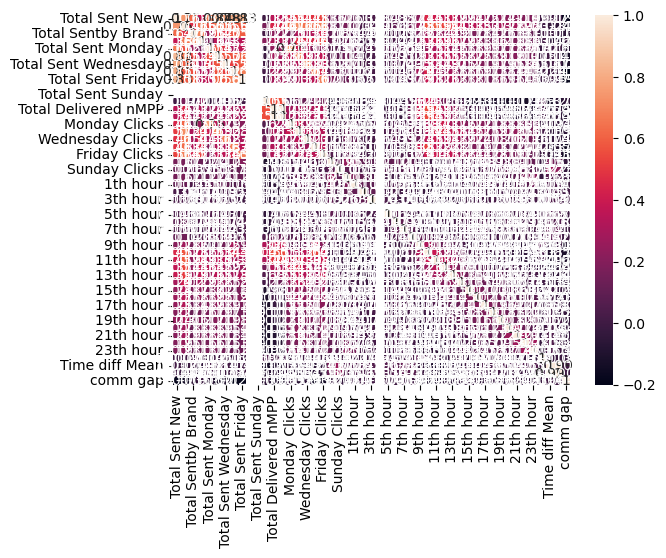

In [347]:
sn.heatmap(corrMatrix,annot=True)

In [348]:
#data_new=data.sample(frac=1).reset_index(drop=True)

In [349]:
data.head()

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state,cls labels
0,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA,Tuesday 2
1,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA,Tuesday 2
2,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA,Thursday 1
3,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA,Thursday 1
4,13299911,225891,Herceptin,11,4,7,3,2,2,1,...,0,0,0,16,46005,0,45,Doctor Of Medicine,ILLINOIS,Thursday 2


In [350]:
#data_new['mdm_state'].value_counts()

In [351]:
data.iloc[:,:-1]

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state
0,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA
1,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA
2,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA
3,273696551,5773137,Venclexta,14,4,14,4,0,4,2,...,0,0,0,0,35,41700,0,16,Doctor Of Medicine,DISTRICT OF COLUMBIA
4,13299911,225891,Herceptin,11,4,7,3,2,2,1,...,0,0,0,0,16,46005,0,45,Doctor Of Medicine,ILLINOIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75709,519734423,512697,Evrysdi,2,1,2,1,1,0,0,...,0,0,0,0,34,41640,0,25,Doctor Of Medicine,MISSOURI
75710,716521879,1260659,Evrysdi,2,1,2,1,0,0,0,...,0,0,0,0,3,64980,0,28,Doctor Of Medicine,CALIFORNIA
75711,721490817,25446288,Cathflo,0,1,0,1,0,0,0,...,0,0,0,0,31,264660,3,1,Nurse Practitioner,SOUTH CAROLINA
75712,1229383610,1265502,Venclexta,0,1,0,1,0,0,0,...,0,0,0,0,52,53520,0,1,Nurse Practitioner,NEW YORK


In [352]:
#train test split

In [353]:
len(list(data['Recipient ID'].unique()))

30911

In [354]:
recipient_list=list(data['Recipient ID'].unique())

In [355]:
train_hcp=recipient_list[:22000]
test_hcp=recipient_list[22000:]

In [356]:
train=data[data['Recipient ID'].isin(train_hcp)]
test=data[data['Recipient ID'].isin(test_hcp)]

In [357]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

In [358]:
train=train.sort_values(by='Recipient ID')
test=test.sort_values(by='Recipient ID')

In [359]:
train

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state,cls labels
50919,50324,6771,Actemra,5,4,5,4,1,3,1,...,0,0,1,30,85515,0,5,Doctor Of Medicine,ARKANSAS,Monday 4
50920,50324,6771,Actemra,5,4,5,4,1,3,1,...,0,0,1,30,85515,0,5,Doctor Of Medicine,ARKANSAS,Wednesday 4
50922,50324,6771,Actemra,5,4,5,4,1,3,1,...,0,0,1,30,85515,0,5,Doctor Of Medicine,ARKANSAS,Wednesday 4
50921,50324,6771,Actemra,5,4,5,4,1,3,1,...,0,0,1,30,85515,0,5,Doctor Of Medicine,ARKANSAS,Wednesday 4
21340,50535,19790724,Evrysdi,3,2,3,2,0,0,2,...,0,0,0,22,80550,0,114,Doctor Of Medicine,KANSAS,Wednesday 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,2010163011,2393362,Venclexta,5,5,5,5,0,0,0,...,0,0,0,32,39408,0,50,Nurse Practitioner,CALIFORNIA,Friday 2
13102,2010163011,2393362,Venclexta,5,5,5,5,0,0,0,...,0,0,0,32,39408,0,50,Nurse Practitioner,CALIFORNIA,Thursday 2
13103,2010163011,2393362,Venclexta,5,5,5,5,0,0,0,...,0,0,0,32,39408,0,50,Nurse Practitioner,CALIFORNIA,Thursday 1
13100,2010163011,2393362,Venclexta,5,5,5,5,0,0,0,...,0,0,0,32,39408,0,50,Nurse Practitioner,CALIFORNIA,Thursday 2


In [360]:
x_train=train.iloc[:,2:-1].reset_index(drop=True)

In [361]:
x_test=test.iloc[:,2:-1].reset_index(drop=True)

In [362]:
y_train=train.iloc[:,-1].reset_index(drop=True)

In [363]:
y_test=test.iloc[:,-1].reset_index(drop=True)

In [364]:
x_train

,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,Total Sent Thursday,Total Sent Friday,...,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state
0,Actemra,5,4,5,4,1,3,1,0,0,...,1,0,0,1,30,85515,0,5,Doctor Of Medicine,ARKANSAS
1,Actemra,5,4,5,4,1,3,1,0,0,...,1,0,0,1,30,85515,0,5,Doctor Of Medicine,ARKANSAS
2,Actemra,5,4,5,4,1,3,1,0,0,...,1,0,0,1,30,85515,0,5,Doctor Of Medicine,ARKANSAS
3,Actemra,5,4,5,4,1,3,1,0,0,...,1,0,0,1,30,85515,0,5,Doctor Of Medicine,ARKANSAS
4,Evrysdi,3,2,3,2,0,0,2,0,1,...,0,0,0,0,22,80550,0,114,Doctor Of Medicine,KANSAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59725,Venclexta,5,5,5,5,0,0,0,4,1,...,0,0,0,0,32,39408,0,50,Nurse Practitioner,CALIFORNIA
59726,Venclexta,5,5,5,5,0,0,0,4,1,...,0,0,0,0,32,39408,0,50,Nurse Practitioner,CALIFORNIA
59727,Venclexta,5,5,5,5,0,0,0,4,1,...,0,0,0,0,32,39408,0,50,Nurse Practitioner,CALIFORNIA
59728,Venclexta,5,5,5,5,0,0,0,4,1,...,0,0,0,0,32,39408,0,50,Nurse Practitioner,CALIFORNIA


In [365]:
x_test

,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,Total Sent Thursday,Total Sent Friday,...,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state
0,Ocrevus,5,1,5,1,0,1,1,2,1,...,0,0,0,0,55,46500,0,117,Doctor Of Medicine,TEXAS
1,Actemra,0,1,0,1,0,0,0,0,0,...,0,0,0,0,15,130500,1,1,Doctor Of Medicine,INDIANA
2,Evrysdi,2,1,2,1,0,0,0,2,0,...,0,0,0,0,24,62640,0,21,Doctor Of Medicine,NEW YORK
3,Evrysdi,2,1,2,1,1,1,0,0,0,...,0,0,0,0,10,51000,0,22,Doctor Of Medicine,WISCONSIN
4,Venclexta,1,1,0,1,0,1,0,0,0,...,0,0,0,0,56,3360,0,1,Nurse Practitioner,WASHINGTON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15979,Evrysdi,3,2,3,2,0,0,2,1,0,...,1,1,0,0,44,76470,0,87,Doctor Of Osteopathic Medicine,MINNESOTA
15980,Evrysdi,3,2,3,2,0,0,2,1,0,...,1,1,0,0,44,76470,0,87,Doctor Of Osteopathic Medicine,MINNESOTA
15981,Erivedge,1,1,1,1,0,0,0,0,1,...,0,0,0,0,1,46860,0,1,Physician Assistant,CALIFORNIA
15982,Xofluza,6,2,6,2,0,2,0,1,3,...,0,0,0,0,14,60240,0,16,Doctor Of Medicine,OHIO


In [366]:
y_train

0           Monday 4
1        Wednesday 4
2        Wednesday 4
3        Wednesday 4
4        Wednesday 3
            ...     
59725       Friday 2
59726     Thursday 2
59727     Thursday 1
59728     Thursday 2
59729     Thursday 2
Name: cls labels, Length: 59730, dtype: object

In [367]:
y_test

0           Monday 2
1          Tuesday 2
2          Tuesday 3
3          Tuesday 3
4           Monday 4
            ...     
15979    Wednesday 4
15980    Wednesday 4
15981       Friday 2
15982      Tuesday 3
15983       Friday 3
Name: cls labels, Length: 15984, dtype: object

In [368]:
cat_feat_new=['Brand',
 'credentials',
 'mdm_state']

In [369]:
cont_feat

['Total Sent New',
 'Total Open New',
 'Total Sentby Brand',
 'Total Openby Brand',
 'Total Sent Monday',
 'Total Sent Tuesday',
 'Total Sent Wednesday',
 'Total Sent Thursday',
 'Total Sent Friday',
 'Total Sent Saturday',
 'Total Sent Sunday',
 'Total Unique Clicks',
 'Total Delivered nMPP',
 'Total Unique Opens nMPP',
 'Monday Clicks',
 'Tuesday Clicks',
 'Wednesday Clicks',
 'Thursday Clicks',
 'Friday Clicks',
 'Saturday Clicks',
 'Sunday Clicks',
 '0th hour',
 '1th hour',
 '2th hour',
 '3th hour',
 '4th hour',
 '5th hour',
 '6th hour',
 '7th hour',
 '8th hour',
 '9th hour',
 '10th hour',
 '11th hour',
 '12th hour',
 '13th hour',
 '14th hour',
 '15th hour',
 '16th hour',
 '17th hour',
 '18th hour',
 '19th hour',
 '20th hour',
 '21th hour',
 '22th hour',
 '23th hour',
 'Mean Click Min',
 'Time diff Mean',
 'Days diff Mean',
 'comm gap']

In [370]:
x_cat_train=x_train[cat_feat_new]
x_cat_test=x_test[cat_feat_new]

In [371]:
x_cont_train=x_train[cont_feat]
x_cont_test=x_test[cont_feat]

In [372]:
x_cont_train.shape

(59730, 49)

In [373]:
x_cat_train.shape

(59730, 3)

In [374]:
o=OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [375]:
x_cat_train_new=pd.DataFrame(o.fit_transform(x_cat_train),columns=list(o.get_feature_names_out()))

In [376]:
x_cat_train_new.head()

,Brand_Actemra,Brand_Activase,Brand_Alecensa,Brand_Cathflo,Brand_Enspryng,Brand_Erivedge,Brand_Evrysdi,Brand_Gavreto,Brand_Gazyva,Brand_Hemlibra,...,mdm_state_TENNESSEE,mdm_state_TEXAS,mdm_state_UTAH,mdm_state_VERMONT,mdm_state_VIRGIN ISLANDS,mdm_state_VIRGINIA,mdm_state_WASHINGTON,mdm_state_WEST VIRGINIA,mdm_state_WISCONSIN,mdm_state_WYOMING
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [377]:
list(x_cat_train_new.columns)

['Brand_Actemra',
 'Brand_Activase',
 'Brand_Alecensa',
 'Brand_Cathflo',
 'Brand_Enspryng',
 'Brand_Erivedge',
 'Brand_Evrysdi',
 'Brand_Gavreto',
 'Brand_Gazyva',
 'Brand_Hemlibra',
 'Brand_Herceptin',
 'Brand_Kadcyla',
 'Brand_Lunsumio',
 'Brand_Ocrevus',
 'Brand_Perjeta',
 'Brand_Phesgo',
 'Brand_Polivy',
 'Brand_Pulmozyme',
 'Brand_Rozlytrek',
 'Brand_Venclexta',
 'Brand_Xofluza',
 'credentials_Doctor Of Dental Medicine',
 'credentials_Doctor Of Dental Surgery',
 'credentials_Doctor Of Medicine',
 'credentials_Doctor Of Optometry',
 'credentials_Doctor Of Osteopathic Medicine',
 'credentials_Doctor Of Podiatric Medicine',
 'credentials_Doctor Of Veterinary Medicine',
 'credentials_Not Available',
 'credentials_Nurse - Non Prescribing',
 'credentials_Nurse Assistant',
 'credentials_Nurse Practitioner',
 'credentials_Pharmacist',
 'credentials_Pharmacy Technician',
 'credentials_Physical Therapist',
 'credentials_Physician Assistant',
 'credentials_Practical/Vocational Nurse',
 'cre

In [378]:
#data['credentials'].value_counts()

In [379]:
#len(list(x_cat_train_new.columns))

In [380]:
x_cat_test_new=pd.DataFrame(o.transform(x_cat_test),columns=list(o.get_feature_names_out()))

In [381]:
x_cat_test_new.head()

,Brand_Actemra,Brand_Activase,Brand_Alecensa,Brand_Cathflo,Brand_Enspryng,Brand_Erivedge,Brand_Evrysdi,Brand_Gavreto,Brand_Gazyva,Brand_Hemlibra,...,mdm_state_TENNESSEE,mdm_state_TEXAS,mdm_state_UTAH,mdm_state_VERMONT,mdm_state_VIRGIN ISLANDS,mdm_state_VIRGINIA,mdm_state_WASHINGTON,mdm_state_WEST VIRGINIA,mdm_state_WISCONSIN,mdm_state_WYOMING
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [382]:
s=StandardScaler()

In [383]:
x_cont_train_new=pd.DataFrame(s.fit_transform(x_cont_train),columns=cont_feat)

In [384]:
x_cont_test_new=pd.DataFrame(s.transform(x_cont_test),columns=cont_feat)

In [385]:
X_train=pd.concat((x_cat_train_new,x_cont_train_new),axis=1)
X_test=pd.concat((x_cat_test_new,x_cont_test_new),axis=1)

In [386]:
X_train.head()

,Brand_Actemra,Brand_Activase,Brand_Alecensa,Brand_Cathflo,Brand_Enspryng,Brand_Erivedge,Brand_Evrysdi,Brand_Gavreto,Brand_Gazyva,Brand_Hemlibra,...,18th hour,19th hour,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.354796,-0.338639,1.469073,-0.372742,-0.353298,1.981238,0.032117,0.007059,-0.22762,-1.129789
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.354796,-0.338639,1.469073,-0.372742,-0.353298,1.981238,0.032117,0.007059,-0.22762,-1.129789
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.354796,-0.338639,1.469073,-0.372742,-0.353298,1.981238,0.032117,0.007059,-0.22762,-1.129789
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.354796,-0.338639,1.469073,-0.372742,-0.353298,1.981238,0.032117,0.007059,-0.22762,-1.129789
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.354796,-0.338639,-0.353537,-0.372742,-0.353298,-0.311582,-0.717491,-0.034047,-0.22762,2.261943


In [387]:
#Feature Selection

In [388]:
#r_et=ExtraTreesRegressor()
#param_et={'n_estimators':[100,150,200,250,300],'max_depth':[3,5,7,9,11,13,15,17,19],'min_samples_leaf':[3,5,7,9,11,13,15,17,19],'min_samples_split':[3,5,7,9,11,13,15,17,19]}
#g_et=GridSearchCV(estimator=r_et,param_grid=param_et,scoring='neg_root_mean_squared_error')
#g_et.fit(X_train,y_train)

In [389]:
e_test=ExtraTreeClassifier(max_depth=5)

In [390]:
e_test.fit(X_train,y_train)

ExtraTreeClassifier(max_depth=5)

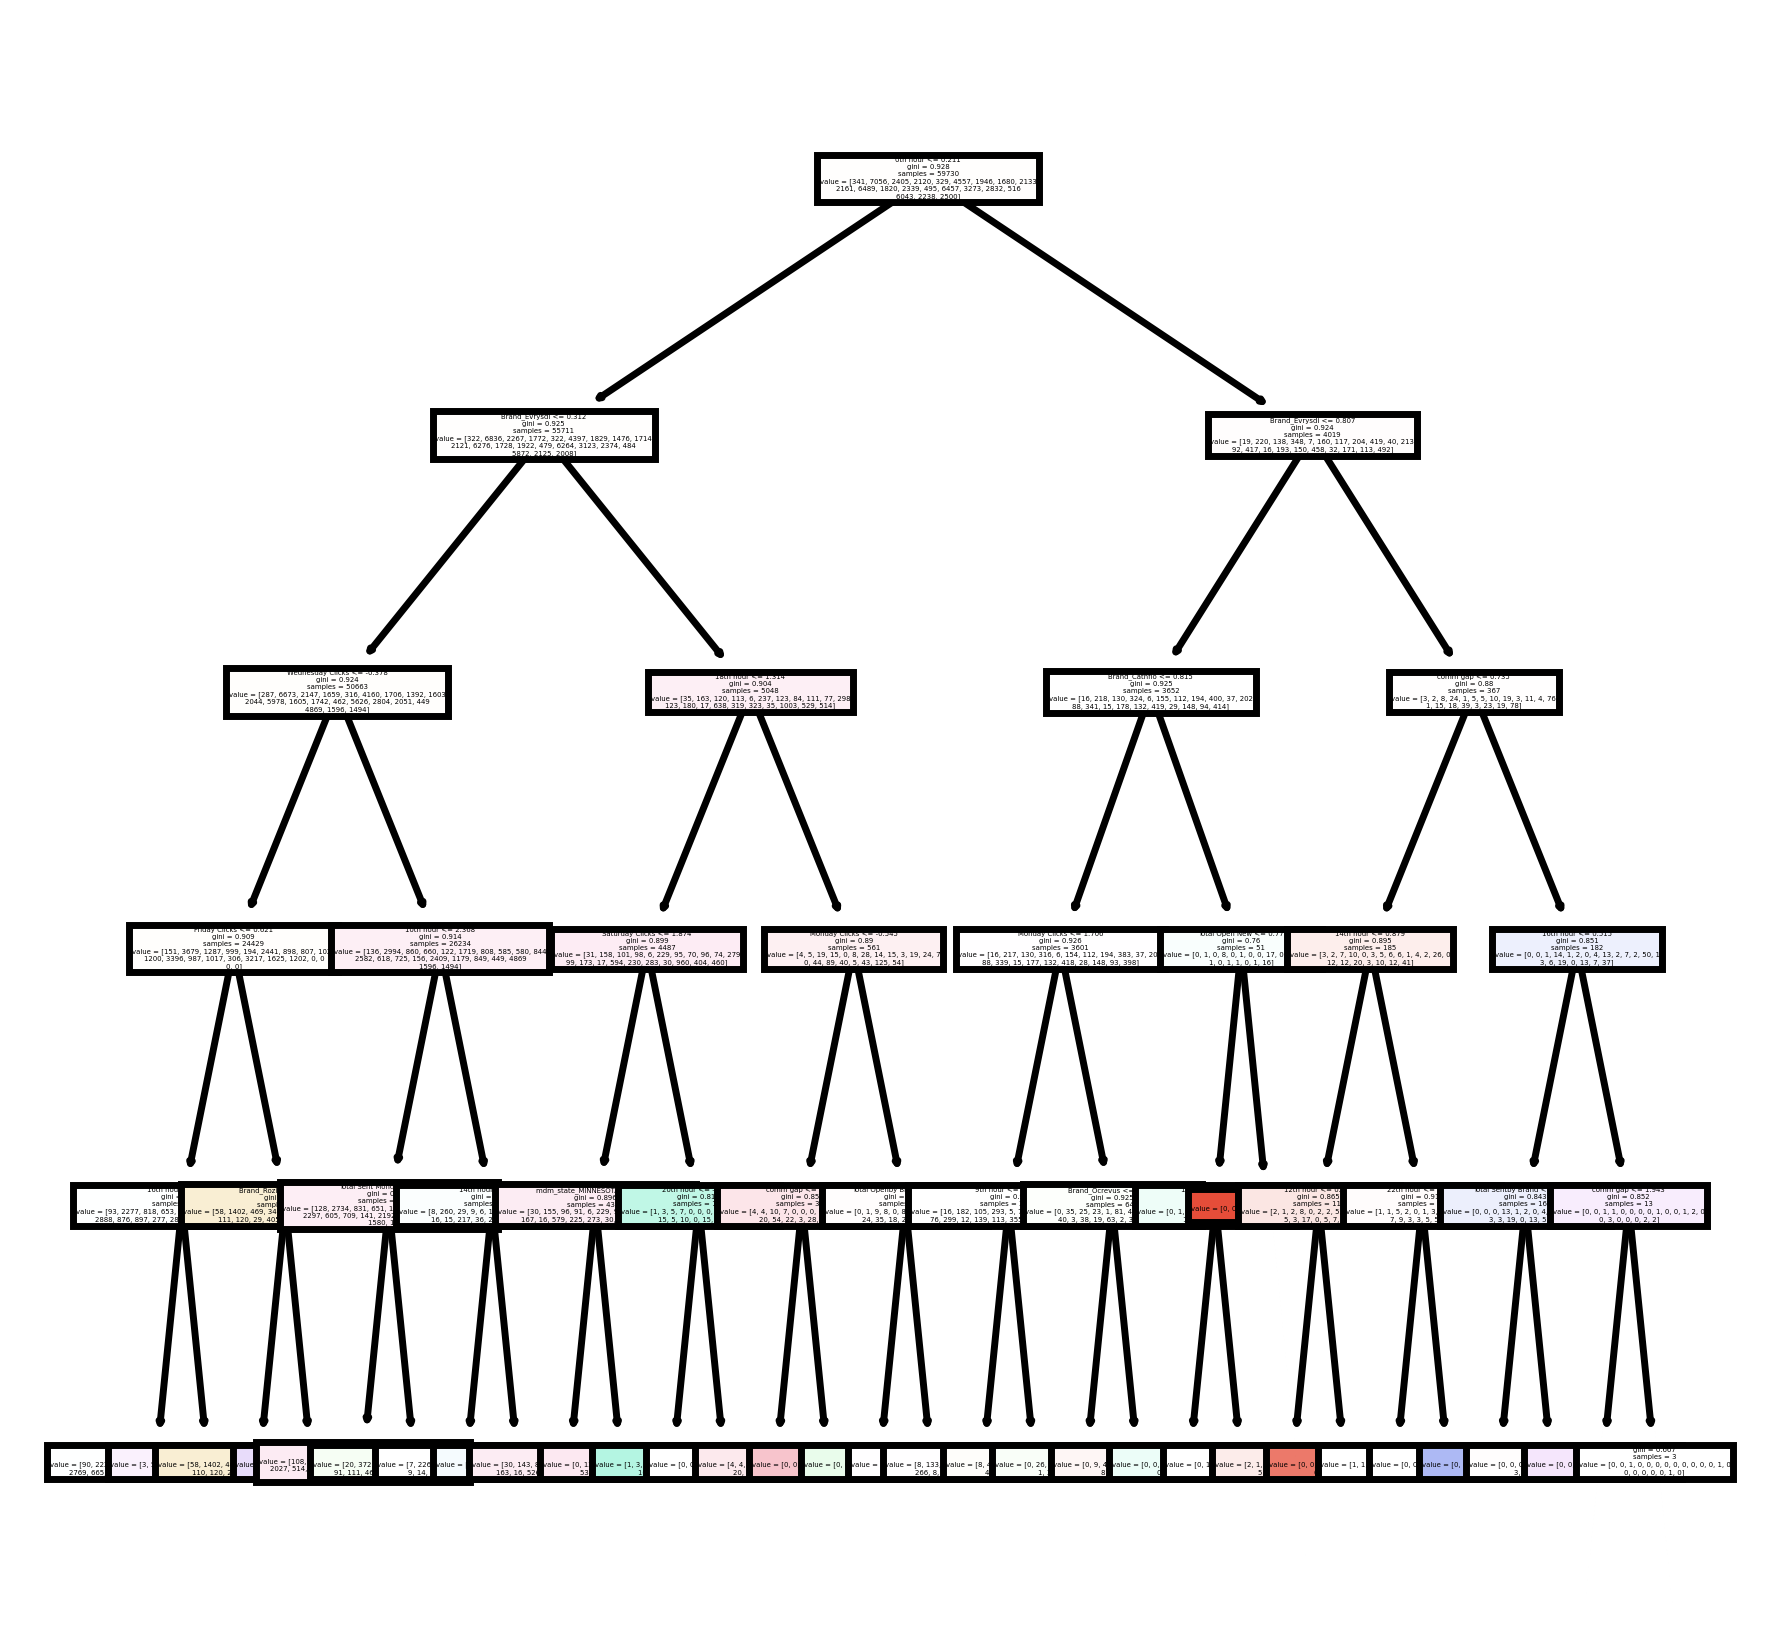

In [391]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)

#plt.figure(figsize=(12, 6))
plot_tree(e_test, filled=True, feature_names=X_train.columns)
plt.show()
fig.savefig("decistion_tree.png")

In [392]:
d_test=DecisionTreeClassifier(max_depth=5)

In [393]:
d_test.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

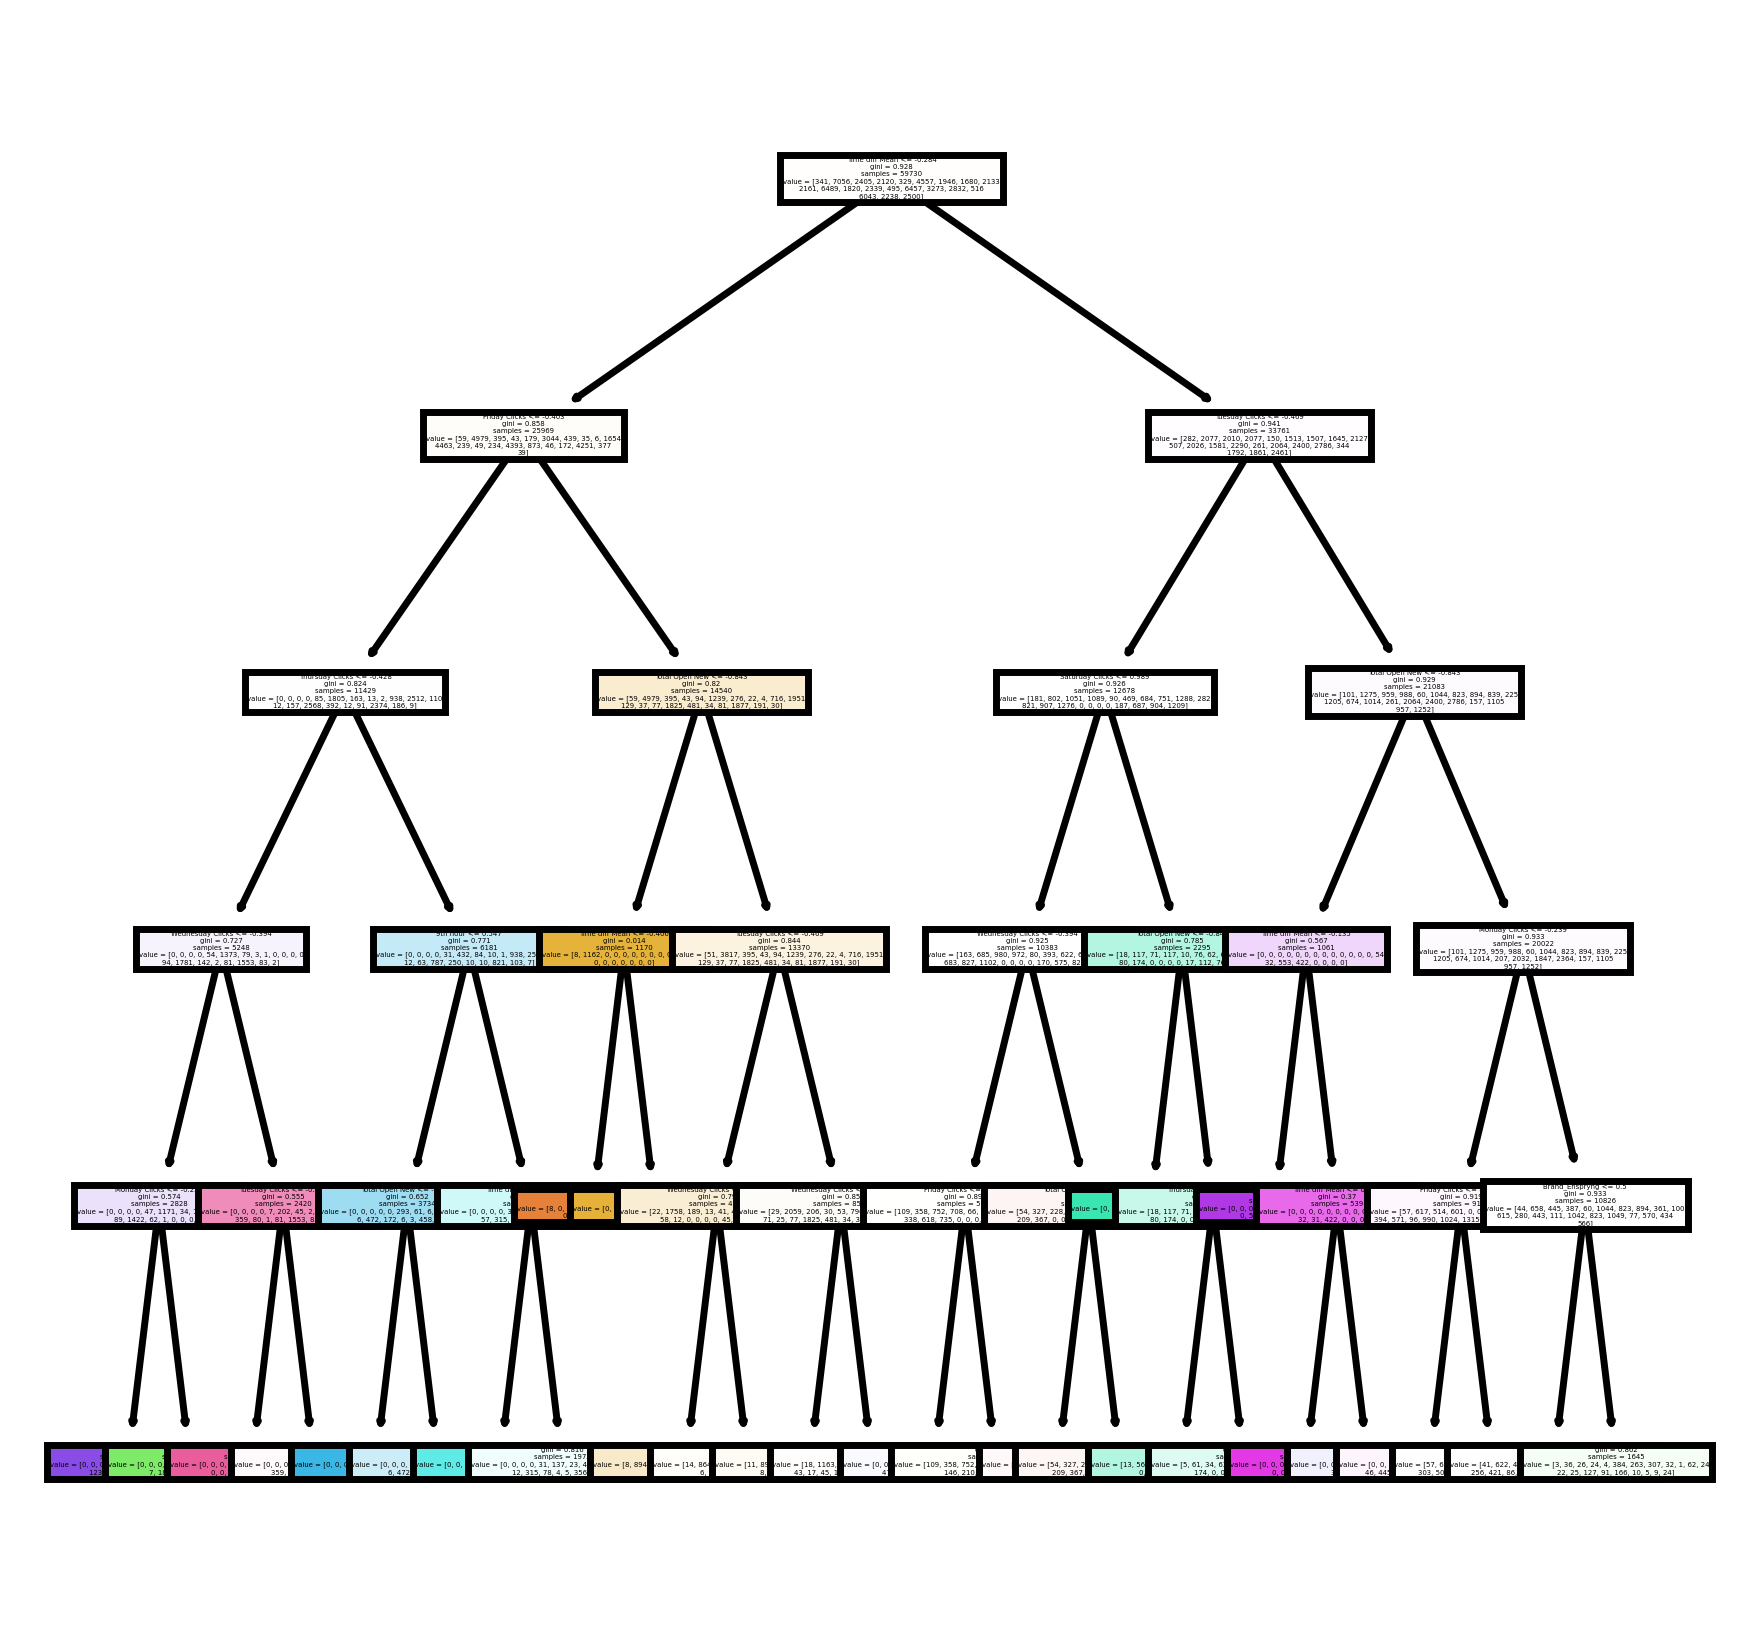

In [394]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)

#plt.figure(figsize=(12, 6))
plot_tree(d_test, filled=True, feature_names=X_train.columns)
plt.show()
#fig.savefig("decistion_tree1.png")

In [147]:
#dot_data = export_graphviz(e_test, out_file=None, 
#                           feature_names=X_train.columns,  
#                           filled=True, rounded=True, special_characters=True)

#graph = graphviz.Source(dot_data)
#graph.render("regression_tree")  # This will save the tree as a PDF file named "regression_tree.pdf"
#graph.view("regression_tree")   # This will open the PDF file using the default viewer

In [148]:
#Feature Selection

In [149]:
#c_et=ExtraTreesClassifier()
#param_et={'n_estimators':[100],'max_depth':[3,5,7,15],'min_samples_leaf':[3,5,7,9,11,13,15],'min_samples_split':[3,5,7,9,11,13,15]}
#g_et=GridSearchCV(estimator=c_et,param_grid=param_et,scoring='accuracy',verbose=4)
#g_et.fit(X_train,y_train)

In [150]:
#rf=RandomForestClassifier()
#param_et={'n_estimators':[100],'max_depth':[9,11,13,15,17],'min_samples_leaf':[3,5,7,9,11,13,15,17],'min_samples_split':[3,5,7,9,11,13,15,17]}
#g_rf=GridSearchCV(estimator=rf,param_grid=param_et,scoring='accuracy',verbose=4)
#g_rf.fit(X_train,y_train)

In [579]:
#pwd

In [580]:
g_rf.best_params_

NameError: name 'g_rf' is not defined

In [ ]:
g_rf.best_params_

In [ ]:
g_rf.best_params_

In [ ]:
#my_dict={'a':[1,2,3],'b':[2,3,4]}

In [ ]:
import json

In [ ]:
with open('/root/CLS/g_rf.best_params_.json', 'w') as file:
    json.dump(g_rf.best_params_, file)

In [ ]:
#with open('/root/CLS/g_rf.best_params_.json', 'w') as file:
#    json.dump(g_rf.best_params_, file)

In [ ]:
#pickle.load(my_dict)

In [ ]:
with open('/root/CLS/my_dict_best_params.json', 'r') as file:
    loaded_dict = json.load(file)

In [ ]:
loaded_dict

In [ ]:
g_rf.best_params_

In [ ]:
#g_et.best_params_

In [ ]:
print('hi')

In [431]:
g_rf_fi=RandomForestClassifier(n_estimators=100,max_depth=13,min_samples_leaf=15,min_samples_split=11)

In [432]:
g_rf_fi= g_rf_fi.fit(X_train,y_train)

In [433]:
f_i=pd.DataFrame({'feature':list(o.get_feature_names_out())+cont_feat,'importance':list(g_rf_fi.feature_importances_)})

In [434]:
f_i.sort_values(by='importance',ascending=False)[:60]

,feature,importance
141,Time diff Mean,0.139332
113,Friday Clicks,0.072203
112,Thursday Clicks,0.067769
110,Tuesday Clicks,0.067716
111,Wednesday Clicks,0.066652
109,Monday Clicks,0.047336
96,Total Open New,0.034596
103,Total Sent Friday,0.026640
100,Total Sent Tuesday,0.025904
127,11th hour,0.025125


In [435]:
f_i.sort_values(by='importance',ascending=False)[60:120]

,feature,importance
35,credentials_Physician Assistant,3.249352e-04
86,mdm_state_TEXAS,2.510378e-04
122,6th hour,2.285738e-04
10,Brand_Herceptin,2.229431e-04
73,mdm_state_NEW YORK,2.135813e-04
25,credentials_Doctor Of Osteopathic Medicine,1.989275e-04
64,mdm_state_MINNESOTA,1.681291e-04
77,mdm_state_OHIO,1.050729e-04
118,2th hour,1.042717e-04
121,5th hour,9.391652e-05


In [436]:
f_i.sort_values(by='importance',ascending=False)[120:]

,feature,importance
52,mdm_state_HAWAII,0.0
60,mdm_state_MAINE,0.0
67,mdm_state_MONTANA,0.0
68,mdm_state_NEBRASKA,0.0
69,mdm_state_NEVADA,0.0
75,mdm_state_NORTH DAKOTA,0.0
82,mdm_state_RHODE ISLAND,0.0
84,mdm_state_SOUTH DAKOTA,0.0
88,mdm_state_VERMONT,0.0
43,mdm_state_ARMED FORCES EUROPE,0.0


In [437]:
sum(g_rf_fi.feature_importances_)

0.9999999999999998

In [438]:
np.mean(g_rf_fi.feature_importances_)

0.006944444444444444

In [439]:
np.median(g_rf_fi.feature_importances_)

8.483532985892412e-05

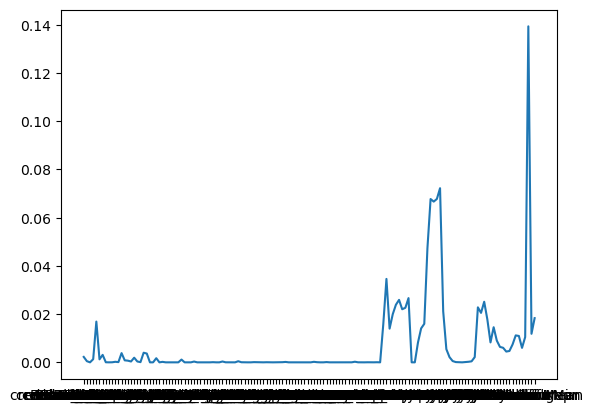

In [440]:
plt.plot(list(o.get_feature_names_out())+cont_feat,list(g_rf_fi.feature_importances_))

In [441]:
df3=f_i.sort_values(by='importance',ascending=False)

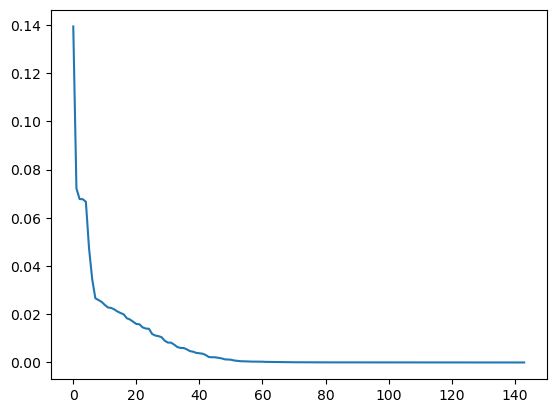

In [442]:
plt.plot(list(range(len(df3))),df3['importance'])

In [443]:
#model=SelectFromModel(c_et_fs,prefit=True,threshold='median')

In [444]:
#X_train_new=model.fit_transform(X_train)

In [445]:
#X_train_new.shape

In [446]:
#X_test_new=model.fit_transform(X_test)

In [447]:
#X_test_new.shape

In [448]:
y_train

0           Monday 4
1        Wednesday 4
2        Wednesday 4
3        Wednesday 4
4        Wednesday 3
            ...     
59725       Friday 2
59726     Thursday 2
59727     Thursday 1
59728     Thursday 2
59729     Thursday 2
Name: cls labels, Length: 59730, dtype: object

In [449]:
y_test

0           Monday 2
1          Tuesday 2
2          Tuesday 3
3          Tuesday 3
4           Monday 4
            ...     
15979    Wednesday 4
15980    Wednesday 4
15981       Friday 2
15982      Tuesday 3
15983       Friday 3
Name: cls labels, Length: 15984, dtype: object

In [450]:
#RF

In [451]:
#rf=RandomForestClassifier()

In [452]:
#param_rf={'n_estimators':[100],'max_depth':[7,9,11],'min_samples_leaf':[7,9,11,13,15],'min_samples_split':[7,9,11,13,15]}

In [453]:
#g_rf=GridSearchCV(estimator=rf,param_grid=param_rf,scoring='accuracy',verbose=4)

In [454]:
#g_rf.fit(X_train_new,y_train)

In [455]:
#g_rf.best_params_

In [456]:
accuracy_score(y_test, g_rf_fi.predict(X_test))

0.555492992992993

In [457]:
y_test_list=list(y_test)
y_pred_list=list(g_rf_fi.predict(X_test))

In [458]:
y_pred_list[10:20]

['Friday 2',
 'Monday 2',
 'Monday 4',
 'Monday 4',
 'Monday 4',
 'Monday 4',
 'Monday 4',
 'Monday 4',
 'Monday 4',
 'Wednesday 4']

In [459]:
y_test_list[10:20]

['Friday 2',
 'Monday 2',
 'Friday 4',
 'Friday 4',
 'Monday 3',
 'Monday 4',
 'Monday 3',
 'Monday 4',
 'Monday 4',
 'Friday 3']

In [460]:
y_test_list_day=list(map(lambda x:x.split()[0],y_test_list))

In [461]:
y_pred_list_day=list(map(lambda x:x.split()[0],y_pred_list))

In [462]:
#y_test_list_day

In [463]:
accuracy_score(y_test_list_day, y_pred_list_day)

0.6702952952952953

In [464]:
def group(x):
    G1=['Monday','Tuesday','Wednesday']
    G2=['Thursday','Friday']
    OOO='OOO Hours'
    if x.split()[0] in G1:
        return 'G1'
    elif x.split()[0] in G2:
        return 'G2'
    else:
        return OOO

In [465]:
y_test_list_group=list(map(group,y_test_list_day))
y_pred_list_group=list(map(group,y_pred_list_day))

In [466]:
accuracy_score(y_test_list_group, y_pred_list_group)

0.7855355355355356

In [467]:
feat_list

['Recipient ID',
 'mdm_id',
 'Brand',
 'Total Sent New',
 'Total Open New',
 'Total Sentby Brand',
 'Total Openby Brand',
 'Total Sent Monday',
 'Total Sent Tuesday',
 'Total Sent Wednesday',
 'Total Sent Thursday',
 'Total Sent Friday',
 'Total Sent Saturday',
 'Total Sent Sunday',
 'Total Unique Clicks',
 'Total Delivered nMPP',
 'Total Unique Opens nMPP',
 'Monday Clicks',
 'Tuesday Clicks',
 'Wednesday Clicks',
 'Thursday Clicks',
 'Friday Clicks',
 'Saturday Clicks',
 'Sunday Clicks',
 '0th hour',
 '1th hour',
 '2th hour',
 '3th hour',
 '4th hour',
 '5th hour',
 '6th hour',
 '7th hour',
 '8th hour',
 '9th hour',
 '10th hour',
 '11th hour',
 '12th hour',
 '13th hour',
 '14th hour',
 '15th hour',
 '16th hour',
 '17th hour',
 '18th hour',
 '19th hour',
 '20th hour',
 '21th hour',
 '22th hour',
 '23th hour',
 'Mean Click Min',
 'Time diff Mean',
 'Days diff Mean',
 'comm gap',
 'credentials',
 'mdm_state',
 'cls labels']

In [468]:
feat_list=feat_list[:-1]

In [469]:
feat_list

['Recipient ID',
 'mdm_id',
 'Brand',
 'Total Sent New',
 'Total Open New',
 'Total Sentby Brand',
 'Total Openby Brand',
 'Total Sent Monday',
 'Total Sent Tuesday',
 'Total Sent Wednesday',
 'Total Sent Thursday',
 'Total Sent Friday',
 'Total Sent Saturday',
 'Total Sent Sunday',
 'Total Unique Clicks',
 'Total Delivered nMPP',
 'Total Unique Opens nMPP',
 'Monday Clicks',
 'Tuesday Clicks',
 'Wednesday Clicks',
 'Thursday Clicks',
 'Friday Clicks',
 'Saturday Clicks',
 'Sunday Clicks',
 '0th hour',
 '1th hour',
 '2th hour',
 '3th hour',
 '4th hour',
 '5th hour',
 '6th hour',
 '7th hour',
 '8th hour',
 '9th hour',
 '10th hour',
 '11th hour',
 '12th hour',
 '13th hour',
 '14th hour',
 '15th hour',
 '16th hour',
 '17th hour',
 '18th hour',
 '19th hour',
 '20th hour',
 '21th hour',
 '22th hour',
 '23th hour',
 'Mean Click Min',
 'Time diff Mean',
 'Days diff Mean',
 'comm gap',
 'credentials',
 'mdm_state']

In [470]:
ls

 brand_chart.csv
 classification_with_brand.csv
 classification_with_outliers.csv
 classification_without_outliers.csv
 day_brand.csv
 decistion_tree.png
 df_for_model.csv
 g_rf.best_params_.json
 hcp_mdm.csv
 hr_brand.csv
'loading+data+and+summarizing-coding (1).ipynb'
 model-classification-final-Copy1.ipynb
 model-classification-final.ipynb
 new_label_classification_without_outliers.csv
 unknown_df_new.csv
 unknown_df_new_latest.csv
'with brand confidence'
'with brand confidence.csv'
 yes_brand_range.csv


In [471]:
final_pred_click_data=pd.read_csv('unknown_df_new_latest.csv')
final_pred_click_data1=pd.read_csv('df_for_model.csv')

In [472]:
final_pred_click_data.shape

(106704, 55)

In [473]:
final_pred_click_data1.shape

(104311, 127)

In [474]:
final_pred_click_data=final_pred_click_data.iloc[:,1:]
final_pred_click_data1=final_pred_click_data1.iloc[:,1:]

In [475]:
final_pred_click_data['Recipient ID']=final_pred_click_data['Recipient ID'].astype(str)
final_pred_click_data1['Recipient ID']=final_pred_click_data1['Recipient ID'].astype(str)
final_pred_click_data['mdm_id']=final_pred_click_data['mdm_id'].astype(str)
final_pred_click_data1['mdm_id']=final_pred_click_data1['mdm_id'].astype(str)

In [476]:
final_pred_click_data.head()

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,20th hour,21th hour,22th hour,23th hour,Mean Click Hour,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state
0,13299911,225891,Perjeta,11,4,2,0,2,2,1,...,0,0,0,0,16,46005,0,45,Doctor Of Medicine,ILLINOIS
1,13235710,195032,Ocrevus,16,1,5,0,6,5,0,...,0,0,0,0,22,48120,0,28,Doctor Of Medicine,ILLINOIS
2,13235710,195032,Activase,16,1,6,0,6,5,0,...,0,0,0,0,22,48120,0,28,Doctor Of Medicine,ILLINOIS
3,13224224,108782,Phesgo,5,3,2,0,0,3,0,...,0,0,0,0,25,39920,0,87,Doctor Of Medicine,GEORGIA
4,13165128,115719,Gazyva,43,10,4,0,5,9,10,...,0,0,0,0,33,41250,0,10,Doctor Of Osteopathic Medicine,KENTUCKY


In [477]:
final_pred_click_data.rename(columns={'Mean Click Hour': 'Mean Click Min'}, inplace=True)
final_pred_click_data1.rename(columns={'Mean Click Hour': 'Mean Click Min'}, inplace=True)

In [478]:
final_pred_click_data=final_pred_click_data[feat_list]
final_pred_click_data

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state
0,13299911,225891,Perjeta,11,4,2,0,2,2,1,...,0,0,0,0,16,46005,0,45,Doctor Of Medicine,ILLINOIS
1,13235710,195032,Ocrevus,16,1,5,0,6,5,0,...,0,0,0,0,22,48120,0,28,Doctor Of Medicine,ILLINOIS
2,13235710,195032,Activase,16,1,6,0,6,5,0,...,0,0,0,0,22,48120,0,28,Doctor Of Medicine,ILLINOIS
3,13224224,108782,Phesgo,5,3,2,0,0,3,0,...,0,0,0,0,25,39920,0,87,Doctor Of Medicine,GEORGIA
4,13165128,115719,Gazyva,43,10,4,0,5,9,10,...,0,0,0,0,33,41250,0,10,Doctor Of Osteopathic Medicine,KENTUCKY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106699,985714316,2339277,Xofluza,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,15,Doctor Of Medicine,TEXAS
106700,985715007,433690,Xofluza,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,NaN
106701,985716021,628359,Xofluza,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,8,Doctor Of Medicine,PENNSYLVANIA
106702,985716664,407722,Xofluza,6,0,6,0,1,0,1,...,0,0,0,0,0,0,0,17,Doctor Of Medicine,MARYLAND


In [479]:
final_pred_click_data1=final_pred_click_data1[feat_list]

In [480]:
final_pred_click_data1

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state
0,321512083,1494,Kadcyla,60,18,2,2,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
1,321512083,1494,Kadcyla,60,18,2,2,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
2,321512083,1494,Venclexta,60,18,28,6,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
3,321512083,1494,Venclexta,60,18,28,6,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
4,321512083,1494,Gavreto,60,18,5,2,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104306,519734423,512697,Evrysdi,2,1,2,1,1,0,0,...,0,0,0,0,34,41640,0,25,Doctor Of Medicine,MISSOURI
104307,716521879,1260659,Evrysdi,2,1,2,1,0,0,0,...,0,0,0,0,3,64980,0,28,Doctor Of Medicine,CALIFORNIA
104308,721490817,25446288,Cathflo,0,1,0,1,0,0,0,...,0,0,0,0,31,264660,3,NaT,Nurse Practitioner,SOUTH CAROLINA
104309,1229383610,1265502,Venclexta,0,1,0,1,0,0,0,...,0,0,0,0,52,53520,0,NaT,Nurse Practitioner,NEW YORK


In [481]:
final_pred_click_data=pd.concat([final_pred_click_data1,final_pred_click_data],axis=0).drop_duplicates().reset_index(drop=True)

In [482]:
final_pred_click_data

,Recipient ID,mdm_id,Brand,Total Sent New,Total Open New,Total Sentby Brand,Total Openby Brand,Total Sent Monday,Total Sent Tuesday,Total Sent Wednesday,...,20th hour,21th hour,22th hour,23th hour,Mean Click Min,Time diff Mean,Days diff Mean,comm gap,credentials,mdm_state
0,321512083,1494,Kadcyla,60,18,2,2,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
1,321512083,1494,Venclexta,60,18,28,6,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
2,321512083,1494,Gavreto,60,18,5,2,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
3,321512083,1494,Gazyva,60,18,5,3,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
4,321512083,1494,Lunsumio,60,18,3,2,8,18,15,...,0,0,0,0,32,40743,0,10,Doctor Of Medicine,GEORGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151505,985714316,2339277,Xofluza,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,15,Doctor Of Medicine,TEXAS
151506,985715007,433690,Xofluza,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,NaT,NaN,NaN
151507,985716021,628359,Xofluza,2,0,2,0,0,0,0,...,0,0,0,0,0,0,0,8,Doctor Of Medicine,PENNSYLVANIA
151508,985716664,407722,Xofluza,6,0,6,0,1,0,1,...,0,0,0,0,0,0,0,17,Doctor Of Medicine,MARYLAND


In [483]:
len(list(final_pred_click_data['Recipient ID'].unique()))

126343

In [484]:
final_pred_click_data=final_pred_click_data.fillna('Not Available')

In [485]:
cat_feat

['Brand', 'credentials', 'mdm_state']

In [486]:
final_pred_click_data['comm gap']=final_pred_click_data['comm gap'].apply(comm_gap_convert)

In [487]:
final_pred_click_data=final_pred_click_data.drop_duplicates().reset_index(drop=True)

In [488]:
cat_feat_new=['Brand',
 'credentials',
 'mdm_state']

In [489]:
x_cat_final=final_pred_click_data[cat_feat_new]
x_cont_final=final_pred_click_data[cont_feat]

In [490]:
x_cat_final_new=pd.DataFrame(o.transform(x_cat_final),columns=list(o.get_feature_names_out()))

In [491]:
x_cont_final_new=pd.DataFrame(s.transform(x_cont_final),columns=cont_feat)

In [492]:
X_final_pred=pd.concat((x_cat_final_new,x_cont_final_new),axis=1)

In [493]:
X_final_pred.shape

(151510, 144)

In [494]:
g_rf_fi.predict(X_final_pred)

array(['Monday 2', 'Friday 2', 'Tuesday 2', ..., 'Thursday 2', 'Monday 2',
       'Friday 2'], dtype=object)

In [495]:
#list_confidence=list(g_rf_fi.predict_proba(X_final_pred))

In [496]:
#max(list(list_confidence[0]))

In [497]:
list_confidence=[int(max(x)*100) for x in list(g_rf_fi.predict_proba(X_final_pred))]

In [498]:
list_confidence[0]

20

In [499]:
fianl_list_rf=list(g_rf_fi.predict(X_final_pred))

In [500]:
final_day_hour=pd.DataFrame({'Recipient ID':final_pred_click_data['Recipient ID'],'mdm_id':final_pred_click_data['mdm_id'],'Brand':final_pred_click_data['Brand'],
                             
                             'day_hour':fianl_list_rf,'Confidence Percentage':list_confidence})

In [501]:
final_day_hour

,Recipient ID,mdm_id,Brand,day_hour,Confidence Percentage
0,321512083,1494,Kadcyla,Monday 2,20
1,321512083,1494,Venclexta,Friday 2,27
2,321512083,1494,Gavreto,Tuesday 2,19
3,321512083,1494,Gazyva,Tuesday 2,18
4,321512083,1494,Lunsumio,Friday 2,21
...,...,...,...,...,...
151505,985714316,2339277,Xofluza,Thursday 2,15
151506,985715007,433690,Xofluza,Thursday 2,21
151507,985716021,628359,Xofluza,Thursday 2,17
151508,985716664,407722,Xofluza,Monday 2,16


In [502]:
2

2

In [503]:
final_day_hour[final_day_hour['Recipient ID']=='321512083']

,Recipient ID,mdm_id,Brand,day_hour,Confidence Percentage
0,321512083,1494,Kadcyla,Monday 2,20
1,321512083,1494,Venclexta,Friday 2,27
2,321512083,1494,Gavreto,Tuesday 2,19
3,321512083,1494,Gazyva,Tuesday 2,18
4,321512083,1494,Lunsumio,Friday 2,21
5,321512083,1494,Polivy,Monday 2,24
6,321512083,1494,Alecensa,Tuesday 2,18
44829,321512083,1494,Erivedge,Tuesday 2,19
44830,321512083,1494,Perjeta,Tuesday 2,19
44831,321512083,1494,Rozlytrek,Tuesday 2,19


In [504]:
final_day_hour.rename(columns={'day_hour': 'day_hour_predicted'}, inplace=True)


In [505]:
final_day_hour.day_hour_predicted.value_counts()

day_hour_predicted
Friday 2       30827
Tuesday 2      26705
Monday 2       26549
Thursday 2     25844
Wednesday 2    18388
Tuesday 4       4325
OOO Hours       3486
Wednesday 4     2802
Thursday 4      2620
Tuesday 3       1780
Friday 4        1718
Friday 3        1431
Monday 4        1238
Wednesday 3     1002
Thursday 3       917
Monday 3         897
Thursday 1       850
Wednesday 1       69
Tuesday 1         31
Monday 1          29
Friday 1           2
Name: count, dtype: int64

In [589]:
data1=pd.DataFrame({'label':list(final_day_hour.day_hour_predicted.value_counts().index),'Count':list(final_day_hour.day_hour_predicted.value_counts())})

In [590]:
data1=data1.sort_values(by='label').reset_index(drop=True)

In [591]:
data1

,label,Count
0,Friday 1,2
1,Friday 2,30827
2,Friday 3,1431
3,Friday 4,1718
4,Monday 1,29
5,Monday 2,26549
6,Monday 3,897
7,Monday 4,1238
8,OOO Hours,3486
9,Thursday 1,850


In [592]:
data1.to_csv('brand_chart_new.csv')

In [226]:
final_day_hour['Confidence Percentage'].value_counts()

Confidence Percentage
19    20491
16    14653
17    13618
20    12119
18    11546
      ...  
87       98
92       67
89       64
88       57
7        19
Name: count, Length: 86, dtype: int64

In [233]:
data2=pd.DataFrame({'percent':list(final_day_hour['Confidence Percentage'].value_counts().index),'Count':list(final_day_hour['Confidence Percentage'].value_counts())})

In [234]:
n=list(range(0,101,5))

In [235]:
data2['Bin'] = pd.cut(data2['percent'], bins=n, labels=[f'{i}-{i+5}' if i < 100 else 'Bucket 95-100' for i in n[:-1]]) # Display the result print(df)

In [236]:
data2

,percent,Count,Bin
0,19,20491,15-20
1,16,14653,15-20
2,17,13618,15-20
3,20,12119,15-20
4,18,11546,15-20
...,...,...,...
81,87,98,85-90
82,92,67,90-95
83,89,64,85-90
84,88,57,85-90


In [238]:
data2.to_csv('with brand confidence.csv')

In [239]:
x=pd.DataFrame(data2.groupby('Bin').agg({'Count':['sum']}).reset_index())
x

,Bin,Count
,,sum
0,0-5,0
1,5-10,2691
2,10-15,17749
3,15-20,72427
4,20-25,30063
5,25-30,4630
6,30-35,3553
7,35-40,2775
8,40-45,2339


In [240]:
x.columns=['range','count']

In [241]:
x.to_csv('yes_brand_range.csv')

In [508]:
hcp_master=pd.read_csv('s3://cmg-oasis-prod-sandbox-commercial-analyst/sandbox_xportfolio_commercial_analyst/email analytics/hcp_master_full_latest/hcp_master.csv')

In [509]:
hcp_master.head()

,mdm_id,mdm_name,mdm_first_name,mdm_last_name,mdm_middle_name,mdm_maiden_name,salutation,party_type,account_type_code,party_status_type_code,...,npi_number,me_number,hin,flag_asum_dead,iqvia_pty_reltio_mdm_id,gene_pty_reltio_mdm_id,load_date,spp_flag,account_type_description,account_sub_type_description
0,1001164,EDWARD MALACHI BEHRENS,EDWARD,BEHRENS,MALACHI,NaN,NaN,IND,NaN,A,...,1.215157e+09,4.101011e+08,NaN,NaN,9FI1Dit,Edp5RIH,2023-11-21T07:41:41.535Z,N,Physician,Doctor Of Medicine
1,1001266,BAHRAM PSC FOROUZANDEH,BAHRAM,FOROUZANDEH,PSC,NaN,NaN,IND,NaN,A,...,1.750357e+09,5.170178e+09,NaN,NaN,5oaDPkp,209rcow,2023-11-21T07:41:41.535Z,N,Physician,Doctor Of Medicine
2,1004291,J THOMAS THOMPSON,J,THOMPSON,THOMAS,NaN,NaN,IND,NaN,I,...,NaN,1.676610e+08,NaN,NaN,HlP3xo8,EeenfI9,2023-11-21T07:41:41.535Z,N,Physician,Doctor Of Osteopathic Medicine
3,1004855,JAMES OWEN FRIDLEY,JAMES,FRIDLEY,OWEN,NaN,NaN,IND,NaN,A,...,1.497973e+09,5.501670e+08,NaN,NaN,1I2Ru5ZT,1nJhslg,2023-11-21T07:41:41.535Z,N,Physician,Doctor Of Medicine
4,100577,MARSHALL ALLEN SCHORIN,MARSHALL,SCHORIN,ALLEN,NaN,NaN,IND,NaN,A,...,1.609817e+09,4.101751e+08,NaN,NaN,1I2S2c5T,bbnvNa7,2023-11-21T07:41:41.535Z,N,Physician,Doctor Of Medicine


In [510]:
final_day_hour['mdm_id']=final_day_hour['mdm_id'].astype(str)

In [511]:
hcp_master.shape

(5034417, 50)

In [512]:
mdm_list=list(map(str,list(final_day_hour['mdm_id'].unique())))

In [513]:
len(mdm_list)

125664

In [514]:
mdm_list[:5]

['1494', '5773137', '115719', '225891', '597']

In [515]:
len(final_day_hour['Recipient ID'].unique())

126343

In [516]:
hcp_master['mdm_id']=hcp_master['mdm_id'].astype(str)
hcp_master['npi_number']=hcp_master['npi_number'].astype(str)

In [517]:
hcp_master=hcp_master[hcp_master['mdm_id'].isin(mdm_list)]

In [518]:
hcp_master.shape

(125403, 50)

In [519]:
def f(x):
    return x.split('.')[0]

In [520]:
f('1.0')

'1'

In [521]:
hcp_master['npi_number']

12         1801857073.0
30         1992705354.0
31         1669541827.0
45         1740290956.0
86         1487622171.0
               ...     
5032254    1649292194.0
5032280    1013968569.0
5032282    1922200617.0
5032283    1740236843.0
5032295    1609972306.0
Name: npi_number, Length: 125403, dtype: object

In [522]:
hcp_master['npi_number']=hcp_master['npi_number'].apply(f)

In [523]:
hcp_master['npi_number']

mdm_npi_zip=dict(zip(hcp_master['mdm_id'],hcp_master['npi_number']))

In [524]:
mdm_npi_zip['1494']

'1831262922'

In [525]:
npi_list=[]

In [526]:
#final_day_hour['mdm_id']=final_day_hour['mdm_id'].astype(str)

In [527]:
for i in list(final_day_hour['mdm_id']):
    try:
        npi_list.append(mdm_npi_zip[i])
    except:
        npi_list.append('Not Available')

In [528]:
#final_day_hour

In [529]:
#npi_list

In [530]:
npi_list.count('Not Available')

402

In [531]:
final_day_hour

,Recipient ID,mdm_id,Brand,day_hour_predicted,Confidence Percentage
0,321512083,1494,Kadcyla,Monday 2,20
1,321512083,1494,Venclexta,Friday 2,27
2,321512083,1494,Gavreto,Tuesday 2,19
3,321512083,1494,Gazyva,Tuesday 2,18
4,321512083,1494,Lunsumio,Friday 2,21
...,...,...,...,...,...
151505,985714316,2339277,Xofluza,Thursday 2,15
151506,985715007,433690,Xofluza,Thursday 2,21
151507,985716021,628359,Xofluza,Thursday 2,17
151508,985716664,407722,Xofluza,Monday 2,16


In [532]:
final_day_hour.insert(2,'npi_number',npi_list)

In [533]:
final_day_hour

,Recipient ID,mdm_id,npi_number,Brand,day_hour_predicted,Confidence Percentage
0,321512083,1494,1831262922,Kadcyla,Monday 2,20
1,321512083,1494,1831262922,Venclexta,Friday 2,27
2,321512083,1494,1831262922,Gavreto,Tuesday 2,19
3,321512083,1494,1831262922,Gazyva,Tuesday 2,18
4,321512083,1494,1831262922,Lunsumio,Friday 2,21
...,...,...,...,...,...,...
151505,985714316,2339277,1194967687,Xofluza,Thursday 2,15
151506,985715007,433690,1952528036,Xofluza,Thursday 2,21
151507,985716021,628359,1164425369,Xofluza,Thursday 2,17
151508,985716664,407722,1457384984,Xofluza,Monday 2,16


In [534]:
final_day_hour.day_hour_predicted.value_counts()

day_hour_predicted
Friday 2       30827
Tuesday 2      26705
Monday 2       26549
Thursday 2     25844
Wednesday 2    18388
Tuesday 4       4325
OOO Hours       3486
Wednesday 4     2802
Thursday 4      2620
Tuesday 3       1780
Friday 4        1718
Friday 3        1431
Monday 4        1238
Wednesday 3     1002
Thursday 3       917
Monday 3         897
Thursday 1       850
Wednesday 1       69
Tuesday 1         31
Monday 1          29
Friday 1           2
Name: count, dtype: int64

In [535]:
new_day_hour=[]

In [536]:
for i in list(final_day_hour['day_hour_predicted']):
    if i.split()[1]=='Hours':
        new_day_hour.append('Friday 3')
    elif i.split()[1]=='4':
        if i.split()[0]=='Monday':
            new_day_hour.append('Monday 3')
        elif i.split()[0]=='Tuesday':
            new_day_hour.append('Tuesday 3')
        elif i.split()[0]=='Wednesday':
            new_day_hour.append('Wednesday 3')
        elif i.split()[0]=='Thursday':
            new_day_hour.append('Thursday 3')
        elif i.split()[0]=='Friday':
            new_day_hour.append('Friday 3')
    else:
        new_day_hour.append(i)

In [537]:
from collections import Counter

In [538]:
Counter(new_day_hour)

Counter({'Friday 2': 30827,
         'Tuesday 2': 26705,
         'Monday 2': 26549,
         'Thursday 2': 25844,
         'Wednesday 2': 18388,
         'Friday 3': 6635,
         'Tuesday 3': 6105,
         'Wednesday 3': 3804,
         'Thursday 3': 3537,
         'Monday 3': 2135,
         'Thursday 1': 850,
         'Wednesday 1': 69,
         'Tuesday 1': 31,
         'Monday 1': 29,
         'Friday 1': 2})

In [539]:
hour_list=[]
day_list=[]
email_group=[]

In [540]:
for i in new_day_hour:
    hour_list.append(i.split()[1])
    day_list.append(i.split()[0])

In [541]:
from collections import Counter
Counter(hour_list)

Counter({'2': 128313, '3': 22216, '1': 981})

In [542]:
pd.Series(hour_list).to_csv('hr_brand.csv')
pd.Series(day_list).to_csv('day_brand.csv')

In [543]:
#for i in list(final_day_hour['day_hour_']):
#        day_list.append(i.split()[0])

In [544]:
Counter(day_list)

Counter({'Friday': 37464,
         'Tuesday': 32841,
         'Thursday': 30231,
         'Monday': 28713,
         'Wednesday': 22261})

In [545]:
G1=['Monday','Tuesday','Wednesday']
G2=['Thursday','Friday']
G3='OOO'

In [546]:
for i in new_day_hour:
        if i.split()[0] in G1:
            email_group.append('G1')
        elif i.split()[0] in G2:
            email_group.append('G2')

In [547]:
Counter(email_group)

Counter({'G1': 83815, 'G2': 67695})

In [548]:
final_day_hour['Recommended Hour Group']=hour_list
final_day_hour['Recommended Day']=day_list
final_day_hour['Recommended Email Group']=email_group

In [549]:
final_day_hour

,Recipient ID,mdm_id,npi_number,Brand,day_hour_predicted,Confidence Percentage,Recommended Hour Group,Recommended Day,Recommended Email Group
0,321512083,1494,1831262922,Kadcyla,Monday 2,20,2,Monday,G1
1,321512083,1494,1831262922,Venclexta,Friday 2,27,2,Friday,G2
2,321512083,1494,1831262922,Gavreto,Tuesday 2,19,2,Tuesday,G1
3,321512083,1494,1831262922,Gazyva,Tuesday 2,18,2,Tuesday,G1
4,321512083,1494,1831262922,Lunsumio,Friday 2,21,2,Friday,G2
...,...,...,...,...,...,...,...,...,...
151505,985714316,2339277,1194967687,Xofluza,Thursday 2,15,2,Thursday,G2
151506,985715007,433690,1952528036,Xofluza,Thursday 2,21,2,Thursday,G2
151507,985716021,628359,1164425369,Xofluza,Thursday 2,17,2,Thursday,G2
151508,985716664,407722,1457384984,Xofluza,Monday 2,16,2,Monday,G1


In [550]:
final_day_hour=final_day_hour.sort_values(by=['Recipient ID','Brand']).reset_index(drop=True)

In [551]:
final_day_hour

,Recipient ID,mdm_id,npi_number,Brand,day_hour_predicted,Confidence Percentage,Recommended Hour Group,Recommended Day,Recommended Email Group
0,100627,33878042,1053747493,Ocrevus,Thursday 2,18,2,Thursday,G2
1,1011273406,19787511,1669716387,Ocrevus,Friday 2,15,2,Friday,G2
2,1011285879,25292264,1033537352,Enspryng,Monday 2,26,2,Monday,G1
3,101295,39362389,nan,Hemlibra,Monday 2,20,2,Monday,G1
4,101379,1555797,1629070651,Evrysdi,Friday 2,24,2,Friday,G2
...,...,...,...,...,...,...,...,...,...
151505,99680,19646703,1497969067,Erivedge,Tuesday 2,25,2,Tuesday,G1
151506,99812,30628954,1902346570,Xofluza,Friday 2,13,2,Friday,G2
151507,99852,1285220,1619977964,Hemlibra,Monday 2,20,2,Monday,G1
151508,998553183,25272739,1497765432,Actemra,Monday 2,19,2,Monday,G1


In [552]:
final_day_hour.npi_number=final_day_hour.npi_number.replace('nan','Not Available')

In [553]:
final_day_hour.columns

Index(['Recipient ID', 'mdm_id', 'npi_number', 'Brand', 'day_hour_predicted',
       'Confidence Percentage', 'Recommended Hour Group', 'Recommended Day',
       'Recommended Email Group'],
      dtype='object')

In [554]:
final_day_hour=final_day_hour[['Recipient ID', 'mdm_id', 'npi_number', 'Brand', 'day_hour_predicted',
       'Confidence Percentage',  'Recommended Day','Recommended Hour Group']]

In [555]:
final_day_hour

,Recipient ID,mdm_id,npi_number,Brand,day_hour_predicted,Confidence Percentage,Recommended Day,Recommended Hour Group
0,100627,33878042,1053747493,Ocrevus,Thursday 2,18,Thursday,2
1,1011273406,19787511,1669716387,Ocrevus,Friday 2,15,Friday,2
2,1011285879,25292264,1033537352,Enspryng,Monday 2,26,Monday,2
3,101295,39362389,Not Available,Hemlibra,Monday 2,20,Monday,2
4,101379,1555797,1629070651,Evrysdi,Friday 2,24,Friday,2
...,...,...,...,...,...,...,...,...
151505,99680,19646703,1497969067,Erivedge,Tuesday 2,25,Tuesday,2
151506,99812,30628954,1902346570,Xofluza,Friday 2,13,Friday,2
151507,99852,1285220,1619977964,Hemlibra,Monday 2,20,Monday,2
151508,998553183,25272739,1497765432,Actemra,Monday 2,19,Monday,2


In [556]:
#final_day_hour['New Hour Group']=final_day_hour['Hour Group'].replace('4','1')

In [557]:
#final_day_hour['New Hour Group'].value_counts()

In [558]:
click_info_data=pd.read_csv('df_for_model.csv')

In [559]:
ls

 brand_chart.csv
 classification_with_brand.csv
 classification_with_outliers.csv
 classification_without_outliers.csv
 day_brand.csv
 decistion_tree.png
 df_for_model.csv
 g_rf.best_params_.json
 hcp_mdm.csv
 hr_brand.csv
'loading+data+and+summarizing-coding (1).ipynb'
 model-classification-final-Copy1.ipynb
 model-classification-final.ipynb
 new_label_classification_without_outliers.csv
 unknown_df_new.csv
 unknown_df_new_latest.csv
'with brand confidence'
'with brand confidence.csv'
 yes_brand_range.csv


In [560]:
click_info_data_unknown=pd.read_csv('unknown_df_new_latest.csv')

In [561]:
#recipients=list(click_info_data['Recipient ID'].unique())

In [562]:
#recipients[:5]

In [563]:
#type(list(final_day_hour['Recipient ID'])[:5][0])

In [564]:
#len(recipients)

In [565]:
#click_data_list=[]

In [566]:
#for i in list(final_day_hour['Recipient ID']):
#    if i in recipients:
#        click_data_list.append('Yes')
#    else:
#        click_data_list.append('No')

In [567]:
#click_data_list.count('No')

In [568]:
#final_day_hour['Has Ever Opened Mail']=click_data_list

In [569]:
#final_day_hour

In [570]:
#click_info_data

In [571]:
#click_info_data_unknown

In [572]:
def f_tuple(x,y):
    return (x,y)

In [573]:
click_info_data['Recipient ID']=click_info_data['Recipient ID'].astype(str)
click_info_data_unknown['Recipient ID']=click_info_data_unknown['Recipient ID'].astype(str)
#final_day_hour
final_day_hour['Recipient ID']=final_day_hour['Recipient ID'].astype(str)

In [574]:
list_opened=list(dict.fromkeys(list((zip(list(click_info_data['Recipient ID']),list(click_info_data['Brand']))))))

In [575]:
list_never_opened=list(dict.fromkeys(list((zip(list(click_info_data_unknown['Recipient ID']),list(click_info_data_unknown['Brand']))))))

In [576]:
for i in list_never_opened:
    if i[0]=='321512083':
        print(i)

('321512083', 'Erivedge')
('321512083', 'Perjeta')
('321512083', 'Rozlytrek')


In [577]:
master_list=list((zip(list(final_day_hour['Recipient ID']),list(final_day_hour['Brand']))))

In [578]:
#master_list

In [579]:
click_data_list_by_brand=[]

In [580]:
for i in master_list:
    if i in list_opened:
        click_data_list_by_brand.append('Yes')
    elif i in list_never_opened:
        click_data_list_by_brand.append('No')

In [581]:
len(master_list)

151510

In [582]:
final_day_hour

,Recipient ID,mdm_id,npi_number,Brand,day_hour_predicted,Confidence Percentage,Recommended Day,Recommended Hour Group
0,100627,33878042,1053747493,Ocrevus,Thursday 2,18,Thursday,2
1,1011273406,19787511,1669716387,Ocrevus,Friday 2,15,Friday,2
2,1011285879,25292264,1033537352,Enspryng,Monday 2,26,Monday,2
3,101295,39362389,Not Available,Hemlibra,Monday 2,20,Monday,2
4,101379,1555797,1629070651,Evrysdi,Friday 2,24,Friday,2
...,...,...,...,...,...,...,...,...
151505,99680,19646703,1497969067,Erivedge,Tuesday 2,25,Tuesday,2
151506,99812,30628954,1902346570,Xofluza,Friday 2,13,Friday,2
151507,99852,1285220,1619977964,Hemlibra,Monday 2,20,Monday,2
151508,998553183,25272739,1497765432,Actemra,Monday 2,19,Monday,2


In [583]:
final_day_hour['Has ever Opened by Brand']=click_data_list_by_brand

In [584]:
final_day_hour[final_day_hour['mdm_id']=='1494']

,Recipient ID,mdm_id,npi_number,Brand,day_hour_predicted,Confidence Percentage,Recommended Day,Recommended Hour Group,Has ever Opened by Brand
87872,321512083,1494,1831262922,Alecensa,Tuesday 2,18,Tuesday,2,Yes
87873,321512083,1494,1831262922,Erivedge,Tuesday 2,19,Tuesday,2,No
87874,321512083,1494,1831262922,Gavreto,Tuesday 2,19,Tuesday,2,Yes
87875,321512083,1494,1831262922,Gazyva,Tuesday 2,18,Tuesday,2,Yes
87876,321512083,1494,1831262922,Kadcyla,Monday 2,20,Monday,2,Yes
87877,321512083,1494,1831262922,Lunsumio,Friday 2,21,Friday,2,Yes
87878,321512083,1494,1831262922,Perjeta,Tuesday 2,19,Tuesday,2,No
87879,321512083,1494,1831262922,Polivy,Monday 2,24,Monday,2,Yes
87880,321512083,1494,1831262922,Rozlytrek,Tuesday 2,19,Tuesday,2,No
87881,321512083,1494,1831262922,Venclexta,Friday 2,27,Friday,2,Yes


In [585]:
final_day_hour.columns

Index(['Recipient ID', 'mdm_id', 'npi_number', 'Brand', 'day_hour_predicted',
       'Confidence Percentage', 'Recommended Day', 'Recommended Hour Group',
       'Has ever Opened by Brand'],
      dtype='object')

In [586]:
#final_day_hour=final_day_hour[['Recipient ID', 'mdm_id', 'npi_number', 'Brand', 'Day', 'Hour Group','New Hour Group',
#       'Email Group', 'Confidence Percentage', 
#       'Has Ever Opened Mail', 'Has ever Opened by Brand']]

In [587]:
final_day_hour

,Recipient ID,mdm_id,npi_number,Brand,day_hour_predicted,Confidence Percentage,Recommended Day,Recommended Hour Group,Has ever Opened by Brand
0,100627,33878042,1053747493,Ocrevus,Thursday 2,18,Thursday,2,No
1,1011273406,19787511,1669716387,Ocrevus,Friday 2,15,Friday,2,No
2,1011285879,25292264,1033537352,Enspryng,Monday 2,26,Monday,2,No
3,101295,39362389,Not Available,Hemlibra,Monday 2,20,Monday,2,No
4,101379,1555797,1629070651,Evrysdi,Friday 2,24,Friday,2,No
...,...,...,...,...,...,...,...,...,...
151505,99680,19646703,1497969067,Erivedge,Tuesday 2,25,Tuesday,2,No
151506,99812,30628954,1902346570,Xofluza,Friday 2,13,Friday,2,No
151507,99852,1285220,1619977964,Hemlibra,Monday 2,20,Monday,2,No
151508,998553183,25272739,1497765432,Actemra,Monday 2,19,Monday,2,No


In [588]:
final_day_hour.to_csv('classification_with_brand_new_rules.csv')